# About This notebook


This notebook has been prepared for our Data Mining course, focusing on applying predictive analytics to solve real-world problems. The contributors to this project are Parisa Tavakoli, Niusha Rouhani and Bita Zhian, who jointly worked on the dataset analysis, model building, and validation processes.

# Table Of content
1. [Importing Essential Libraries for Data Analysis and Visualization in Python](#1-importing-essential-libraries-for-data-analysis-and-visualization-in-python)
2. [Loading and Previewing the Dataset: Initial Insights into Rain Data](#2-loading-and-previewing-the-dataset-initial-insights-into-rain-data)
3. [Identifying Categorical and Numerical Features in the Rain Dataset](#3-identifying-categorical-and-numerical-features-in-the-rain-dataset)
4. [Exploring the Rain Labels](#-4-Exploring-the-Rain-Labels)
5. [Encoding](#-5-Encoding)
6. [Split Data into Training and Testing Set](#-6-Split-Data-into-Training-and-Testing-Set)
7. [Training and Evaluation of K-Nearest Neighbors (KNN) Classifier](#-7-Training-and-Evaluation-of-K-Nearest-Neighbors-(KNN)-Classifier)
8.[Training and Evaluation of Decision Tree Classifier](#-8-Training-and-Evaluation-of-Decision-Tree-Classifier)
9. [Training and Evaluation of Support Vector Machine (SVM) Classifier](#-9-Training-and-Evaluation-of-Support-Vector-Machine-(SVM)-Classifier)
10. [Comparison of Model Performance](#-10-Comparison-of-Model-Performance)

# Note For viewers
Each section of this report corresponds to a milestone we set at the project's inception. The report details the approach taken, the technologies used, and the exact locations within our Jupyter Notebook where the related code can be found.

1. Handling Categorical Features with Missing Values: 3.1
2. Handling Numerical Features with Missing Values and Outliers: 3.2
3.  Correlation Heatmap: 4.5
4. Label Encoding(Categorical To Numerical): 5.1 and 5.2
5. KNN: 7
6. DT: 8
7. SVM: 9
8. Comaprison: 10

I hope we covered everything that was needed :D

# Further Questions?

If you have any further questions, feel free to contact me at [Parisa.Tavakoli.81@gmail.com](mailto:Parisa.Tavakoli.81@gmail.com).


# 1 Importing Essential Libraries for Data Analysis and Visualization in Python

## 1.1 Library Imports and Dependencies

All required libraries for this notebook's operations are consolidated and imported in the following cell. This setup ensures comprehensive support for data manipulation, visualization, and machine learning tasks, streamlining the environment for seamless execution.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
import datetime

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    jaccard_score, f1_score, log_loss, confusion_matrix,
    accuracy_score, precision_score, recall_score, classification_report
)

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras import callbacks
from tensorflow.keras import regularizers

# Setting random seed for reproducibility
np.random.seed(0)

# Configuring inline plotting via matplotlib
%matplotlib inline

## 1.2 Suppression of Warnings

To ensure clarity in output and focus on essential results, non-critical Python warnings were suppressed during the execution of the project. This was achieved through the following code snippet:

In [ ]:
# Surpressing warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


This approach helps in maintaining a clean output by preventing the display of routine warnings related to deprecations or minor issues, thus allowing for uninterrupted analysis and presentation.

## 1.3 Setting a Global Color Palette

To enhance visual consistency across all charts in the analysis, a global color palette is defined. This palette will be used for all subsequent visualizations to maintain uniformity and improve the aesthetic appeal of the report.

By setting the palette with `sns.set_palette()`, you ensure that seaborn plots throughout the notebook will automatically use these colors. This eliminates the need to specify the `palette` parameter in each plotting function, simplifying the code and ensuring consistency.


In [ ]:
# Define a global color palette
global_palette = ["#C2C4E2", "#EED4E5"]

# Set the color palette in seaborn for all plots
sns.set_palette(sns.color_palette(global_palette))

# 2 Loading and Previewing the Dataset: Initial Insights into Rain Data

## 2.1 Loading the Dataset

The dataset, containing rain data, is loaded from a CSV file named Dataset.csv into a Pandas DataFrame called rain. This initial step is crucial for the subsequent data handling and analysis tasks, setting the foundation for exploring and manipulating the data.

In [ ]:
# Load the dataset
rain = pd.read_csv('Dataset.csv')

## 2.2 Previewing the Dataset

To get an initial understanding of the dataset's structure and the types of data it contains, the first few rows are displayed using the `head()` method on the DataFrame `rain`. This provides a quick snapshot of the columns and the values they hold, which is essential for assessing data quality and preparing for further data exploration and cleaning.

In [ ]:
# Display the first few rows of the dataset
rain.head()

,Unnamed: 0,Date,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,...,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after
0,0,12/1/2008,Station 2,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,1,12/2/2008,Station 2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2,12/3/2008,Station 2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,3,12/4/2008,Station 2,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,4,12/5/2008,Station 2,17.5,32.3,1.0,NaN,NaN,W,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


This command outputs the top five rows of the dataset, offering immediate insight into the dataset's format, the nature of the attributes, and preliminary data characteristics such as the presence of any missing values or the data types of each column.

## 2.3 Understanding Dataset Dimensions

To assess the size of the dataset, the `shape` attribute of the DataFrame `rain` is used. This attribute provides the total number of rows and columns, helping to understand the scale of the data and guiding subsequent data processing decisions.

In [ ]:
rain.shape

(56593, 24)


This line of code outputs a tuple representing the number of rows (data entries) and columns (features) in the dataset. Knowing the dimensions is crucial for planning the data analysis, including handling missing values, scaling data, and selecting appropriate machine learning models.

## 2.4 Dataset Structure and Content Overview

To further explore the dataset, the `info()` method is called on the DataFrame `rain`. This method provides a concise summary of the DataFrame, including the number of non-null entries in each column, the data type of each column, and memory usage. It is particularly useful for quickly identifying columns with missing values and understanding the data types that need to be converted or handled differently during preprocessing.

In [ ]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56593 entries, 0 to 56592
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    56593 non-null  int64  
 1   Date                          56593 non-null  object 
 2   Weather Station               56593 non-null  object 
 3   Minimum Temperature           55977 non-null  float64
 4   Maximum Temperature           56150 non-null  float64
 5   Rainfall                      55157 non-null  float64
 6   Evaporation                   24047 non-null  float64
 7   Sunshine                      18441 non-null  float64
 8   Gust Trajectory               50720 non-null  object 
 9   Air Velocity                  50727 non-null  float64
 10  Gust Trajectory at  9 AM      50301 non-null  object 
 11  Gust Trajectory at  3 PM      53899 non-null  object 
 12  Air Velocity at  9 AM         55233 non-null  float64
 13  A


This function is essential for preliminary data checks, helping to guide decisions on data cleaning and type conversions which are crucial for effective data analysis and model training. It ensures that all features are appropriately formatted and ready for further analytical steps.

## 2.5 Removing Redundant Columns

In the process of data cleaning, the column labeled `'Unnamed: 0'` is removed from the DataFrame `rain`. This column, typically generated during data export or import when an index column is included without a name, is redundant and does not hold any useful information for analysis.

In [ ]:
rain.drop('Unnamed: 0', axis=1, inplace=True)

By setting `axis=1`, the operation targets columns (not rows), and `inplace=True` modifies the DataFrame directly. Removing this column simplifies the dataset, enhancing clarity and reducing memory usage, which can improve processing efficiency in subsequent data manipulation and analysis steps. This step is crucial for maintaining a clean and focused dataset for accurate and efficient analysis.

In [ ]:
print(rain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56593 entries, 0 to 56592
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          56593 non-null  object 
 1   Weather Station               56593 non-null  object 
 2   Minimum Temperature           55977 non-null  float64
 3   Maximum Temperature           56150 non-null  float64
 4   Rainfall                      55157 non-null  float64
 5   Evaporation                   24047 non-null  float64
 6   Sunshine                      18441 non-null  float64
 7   Gust Trajectory               50720 non-null  object 
 8   Air Velocity                  50727 non-null  float64
 9   Gust Trajectory at  9 AM      50301 non-null  object 
 10  Gust Trajectory at  3 PM      53899 non-null  object 
 11  Air Velocity at  9 AM         55233 non-null  float64
 12  Air Velocity at  3 PM         54616 non-null  float64
 13  M

## 2.6 Generating Descriptive Statistics and Enhancing Presentation

This segment of the analysis involves generating descriptive statistics for numerical columns in the `rain` DataFrame, excluding columns of type `object`, which typically contain non-numeric data. The `.describe()` method provides key statistics such as mean, median, standard deviation, minimum, and maximum values, essential for gaining insights into the distribution and variability of data.

To improve the readability and accessibility of these statistics, the DataFrame is then transposed:


Transposing the statistics DataFrame rearranges it so that the statistical measures (mean, count, standard deviation, etc.) are displayed as columns rather than rows. This makes it easier to compare these measures across different features.

This step allows for a more intuitive presentation of the data, enabling quick visual assessments and facilitating easier communication of the data's characteristics. It's particularly useful when dealing with multiple variables, helping to provide a clearer summary of each attribute's statistical properties in the dataset.

In [ ]:
stats = rain.describe(exclude=[object])

# Now transpose the DataFrame
transposed_stats = stats.T

# Display the transposed DataFrame
display(transposed_stats)

,count,mean,std,min,25%,50%,75%,max
Minimum Temperature,55977.0,11.841653,6.441874,-8.5,7.3,12.4,17.0,29.7
Maximum Temperature,56150.0,22.614196,6.831782,-4.8,18.3,22.4,26.8,47.3
Rainfall,55157.0,2.656582,9.170838,0.0,0.0,0.0,0.8,371.0
Evaporation,24047.0,5.528760,4.483735,0.0,2.8,4.6,7.2,145.0
Sunshine,18441.0,7.568706,3.798647,0.0,4.9,8.6,10.5,14.1
Air Velocity,50727.0,39.408185,14.140223,7.0,30.0,37.0,48.0,135.0
Air Velocity at 9 AM,55233.0,13.054551,9.134150,0.0,6.0,11.0,19.0,130.0
Air Velocity at 3 PM,54616.0,17.848195,9.286105,0.0,11.0,17.0,24.0,83.0
Moisture Level at 9 AM,55360.0,70.850217,17.708315,3.0,59.0,72.0,84.0,100.0
Moisture Level at 3 PM,54882.0,53.063755,20.817710,1.0,38.0,53.0,68.0,100.0


## 2.7 Descriptive Statistics for Categorical Data

For a comprehensive analysis, it's important to understand not only the numerical attributes but also the categorical ones. This code snippet calculates descriptive statistics for columns of type `object` in the `rain` DataFrame, which are typically categorical or textual data. The `.describe()` method, when used with the parameter `include=[object]`, focuses on statistics relevant to categorical data, such as count, unique count, top, and frequency of the most common category.

To improve the accessibility and presentation of this data, the DataFrame containing the statistics is transposed:

This transposition changes the layout so that each categorical column's descriptive metrics are displayed as rows, making it easier to read and compare across categories.

This visualization strategy enhances the ease with which these statistics can be analyzed and understood, facilitating better data-driven decisions about data preprocessing tasks such as encoding strategies or handling of categorical variables.

In [ ]:
stats2 = rain.describe(include=[object])

# Now transpose the DataFrame
transposed_stats2 = stats2.T

# Display the transposed DataFrame
display(transposed_stats2)

,count,unique,top,freq
Date,56593,3436,1/21/2012,19
Weather Station,56593,19,Station 9,3436
Gust Trajectory,50720,16,W,4046
Gust Trajectory at 9 AM,50301,16,NW,4039
Gust Trajectory at 3 PM,53899,16,NE,4650
Rain that day,55156,2,No,42701
Rain the day after,55157,2,No,42703


## 2.8 Evaluating Class Distribution in the Dataset

To assess whether the dataset suffers from class imbalance, which is a common issue in predictive modeling that can significantly impact the performance of a model, a visualization of the target variable `Rain the day after` is created using a countplot. This visualization helps in quickly identifying disparities in the number of instances for each class.
Such an evaluation is crucial as it influences the choice of data preprocessing techniques such as resampling or the application of different evaluation metrics that are more appropriate for imbalanced data. By visually assessing the balance of the dataset, one can better prepare for accurate model training and evaluation.

Percentage of 'No': 77.42%
Percentage of 'Yes': 22.58%


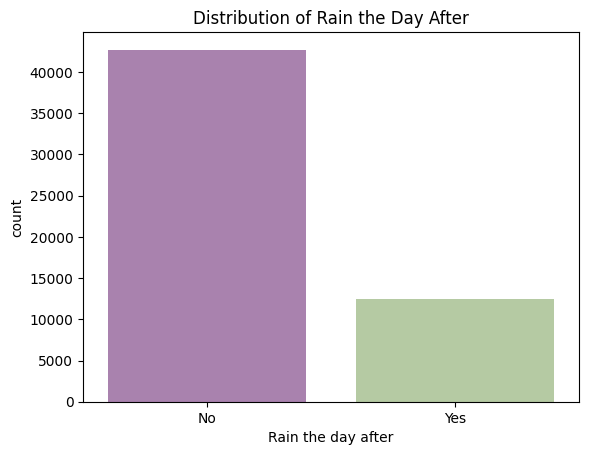

In [ ]:
# Calculate the counts and percentages of each response
counts = rain['Rain the day after'].value_counts()
percentages = rain['Rain the day after'].value_counts(normalize=True) * 100

# Print the percentages
print("Percentage of 'No': {:.2f}%".format(percentages['No']))
print("Percentage of 'Yes': {:.2f}%".format(percentages['Yes']))

# Create a count plot
cols = ["#ae7bb5", "#B5D09C"]  # Color palette for the plot
sns.countplot(x=rain["Rain the day after"], palette=cols)
plt.title('Distribution of Rain the Day After')
plt.show()

# 3 Identifying Categorical and Numerical Features in the Rain Dataset

## 3.1 Identification of Categorical Features

In the preprocessing phase, it is essential to identify and categorize the types of features present in the dataset. This code snippet focuses on identifying categorical features—attributes with data type 'object' (often strings representing categories). Understanding the nature and number of categorical features is crucial for determining the need for data transformation techniques such as encoding.

In [ ]:
categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 7
Categorical Features:  ['Date', 'Weather Station', 'Gust Trajectory', 'Gust Trajectory at  9 AM', 'Gust Trajectory at  3 PM', 'Rain that day', 'Rain the day after']


### 3.1.1 Cardinality Check for Categorical Features

Before encoding categorical data for use in machine learning models such as Logistic Regression and Support Vector Machines, it's crucial to assess the cardinality of these features. Cardinality refers to the number of unique values in a feature column. High cardinality in features, like a column containing hundreds of unique zip codes, can significantly complicate model training:

- **Challenges of High Cardinality**: Features with high cardinality can lead to a substantial increase in dataset dimensions when encoded, potentially degrading model performance.
- **Strategies for High Cardinality**: To mitigate issues associated with high cardinality, feature engineering can be applied to derive new, more manageable features. Alternatively, features that offer minimal predictive value might be dropped entirely.

This approach ensures the dataset is optimally prepared, maintaining model efficiency and effectiveness.

In [ ]:
for each_feature in categorical_features:
   unique_values = len(rain[each_feature].unique())
   print("Cardinality(no. of unique values) of {} are: {}".format(each_feature, unique_values))

Cardinality(no. of unique values) of Date are: 3436
Cardinality(no. of unique values) of Weather Station are: 19
Cardinality(no. of unique values) of Gust Trajectory are: 17
Cardinality(no. of unique values) of Gust Trajectory at  9 AM are: 17
Cardinality(no. of unique values) of Gust Trajectory at  3 PM are: 17
Cardinality(no. of unique values) of Rain that day are: 3
Cardinality(no. of unique values) of Rain the day after are: 3


### 3.1.2 Transforming and Extracting Date Components from the Rain Dataset

**Challenges and Feature Engineering for High Cardinality in Date Column**

The Date column in our dataset exhibits high cardinality, which can lead to inefficiencies in machine learning models due to increased dimensionality when the dates are converted to numerical formats. This situation necessitates specific preprocessing steps to enhance model performance.

In [ ]:
rain['Date'].dtype

dtype('O')

In [ ]:
# Convert the 'Date' column to datetime
rain['Date'] = pd.to_datetime(rain['Date'])

# Extract year, month, and day
rain['Year'] = rain['Date'].dt.year
rain['Month'] = rain['Date'].dt.month
rain['Day'] = rain['Date'].dt.day


In [ ]:
# Drop the original 'Date' column
rain.drop('Date', axis=1, inplace=True)

In [ ]:
# Display the updated DataFrame to check the result
rain.head()

,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,...,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after,Year,Month,Day
0,Station 2,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Station 2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Station 2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Station 2,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Station 2,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [ ]:
# categorical data:

categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 6
Categorical Features:  ['Weather Station', 'Gust Trajectory', 'Gust Trajectory at  9 AM', 'Gust Trajectory at  3 PM', 'Rain that day', 'Rain the day after']


In [ ]:
# Numerical Features:

numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
#rain.select_dtypes(include=['float64','int64']).columns
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 19
Numerical Features:  ['Minimum Temperature', 'Maximum Temperature', 'Rainfall', 'Evaporation', 'Sunshine', 'Air Velocity', 'Air Velocity at  9 AM', 'Air Velocity at  3 PM', 'Moisture Level at 9 AM', 'Moisture Level at 3 PM', 'Atmospheric Pressure at 9 AM', 'Atmospheric Pressure at 3 PM', 'Cloudiness at 9 AM', 'Cloudiness at 3 PM', 'Recorded Temperature at 9 AM', 'Recorded Temperature at 3 PM', 'Year', 'Month', 'Day']


As we can see after chnaging Date we have three more Numerical Feature and one less categorical.

### 3.1.3 Visualization of Daily Distribution Over a Year

To understand the temporal distribution within the dataset, a visualization is created that represents roughly a year's span of data from the rain DataFrame. This visualization helps in assessing any seasonal patterns or anomalies in the dataset over a year.

Text(0.5, 0, 'Days In Year')

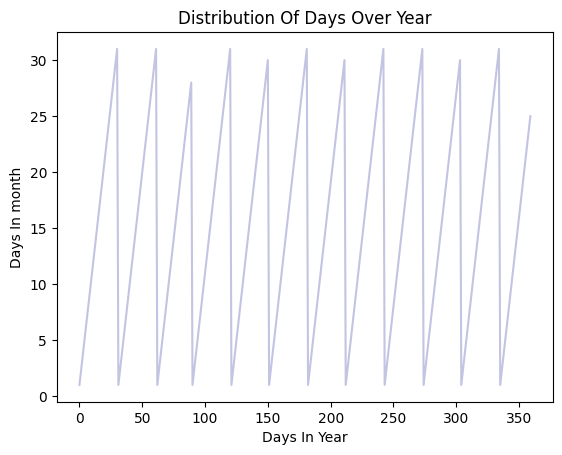

In [ ]:
# roughly a year's span section
section = rain[:360]
tm = section["Day"].plot(color="#C2C4E2")
tm.set_title("Distribution Of Days Over Year")
tm.set_ylabel("Days In month")
tm.set_xlabel("Days In Year")

### 3.1.4 Correlation Analysis Among Numerical Features

Understanding the interrelationships among numerical features in the dataset is crucial for both feature selection and modeling. A correlation analysis helps identify how closely changes in one feature are associated with changes in another, which can influence model building and feature engineering.

<Axes: >

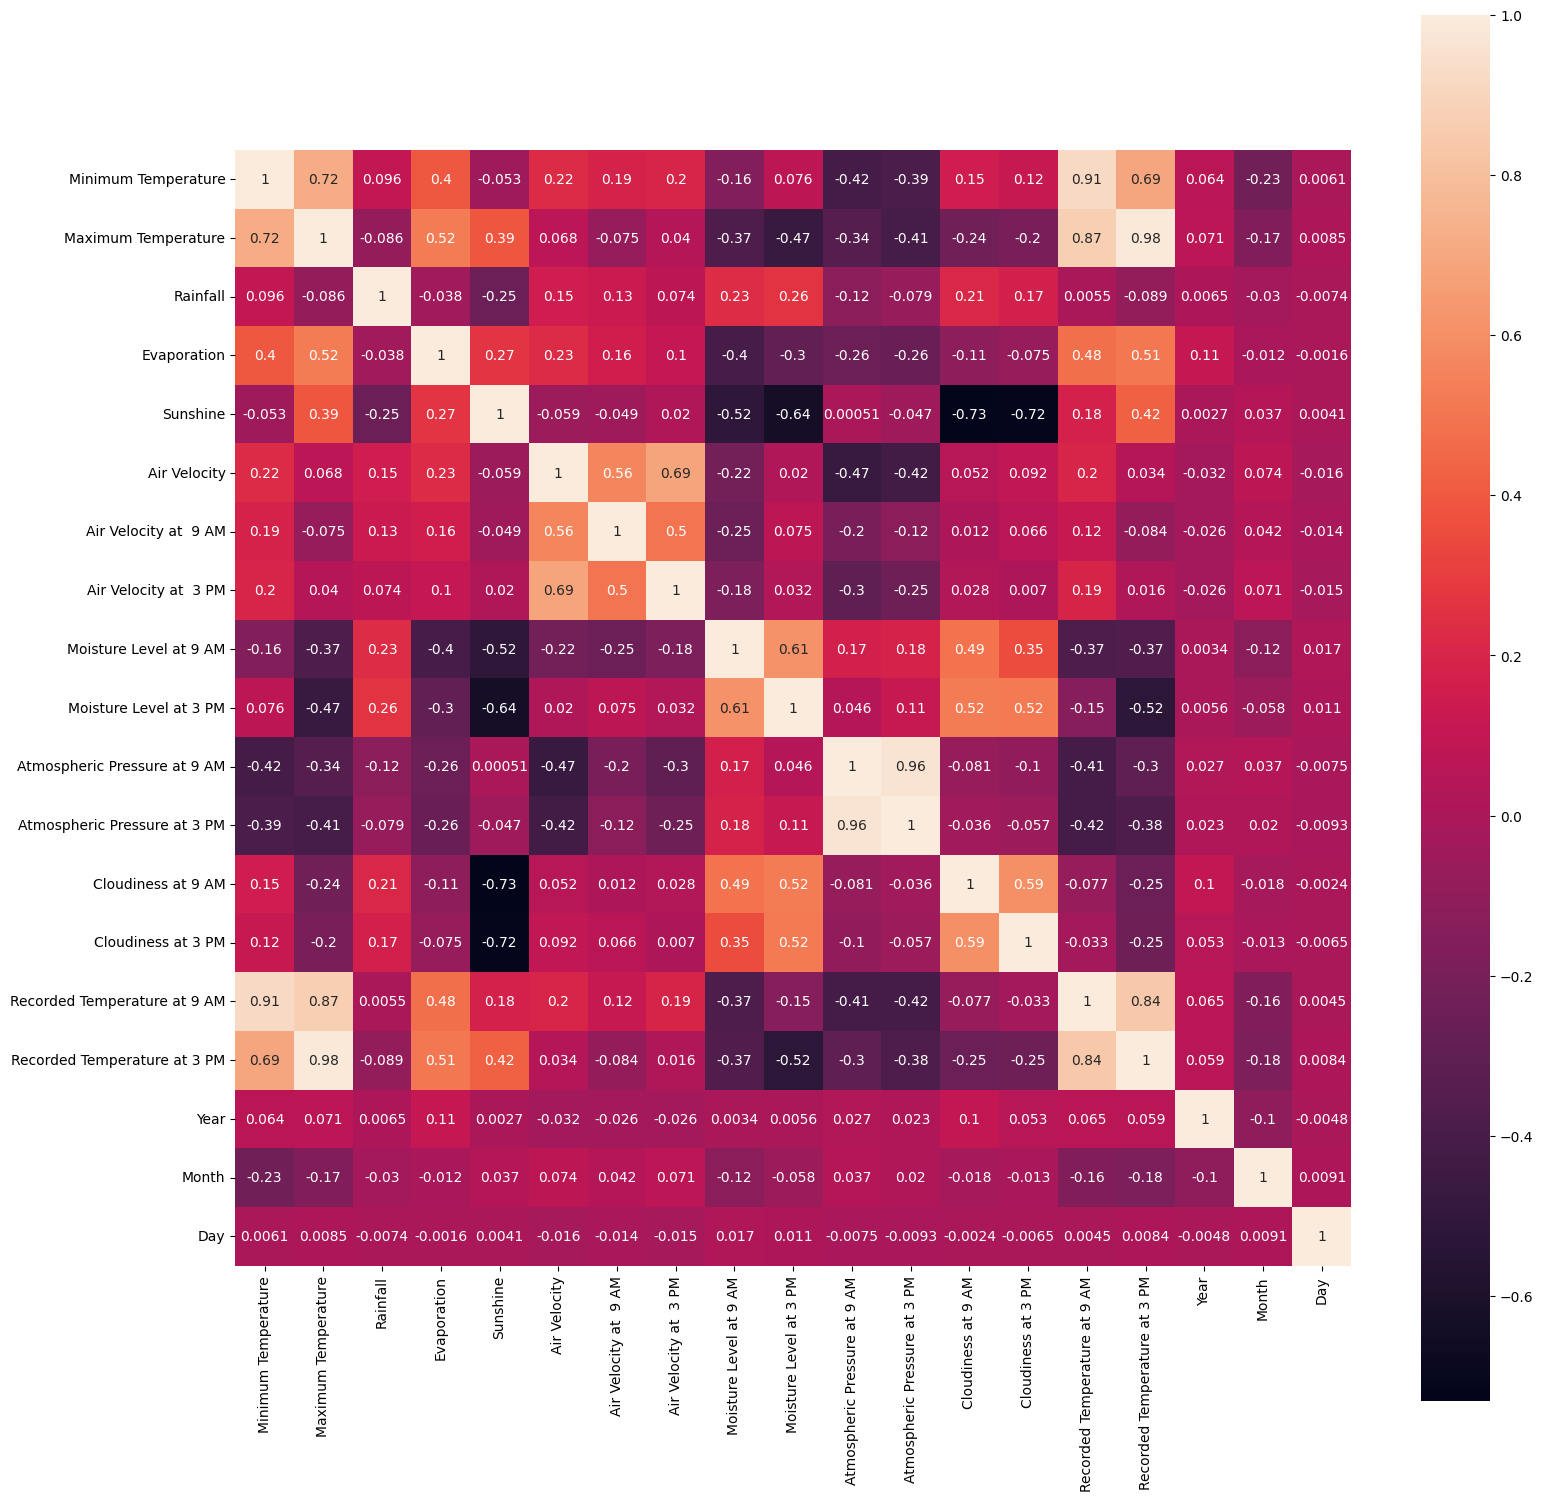

In [ ]:
# Select only numeric columns from the DataFrame
numeric_data = rain.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric attributes
corrmat = numeric_data.corr()

# Generate a heatmap to visualize the correlation matrix
plt.subplots(figsize=(18, 18))
sns.heatmap(corrmat, annot=True, square=True)


### 3.1.5 Assessment of Missing Values in Categorical Features

Identifying and quantifying missing data within categorical features is a critical step in data preprocessing. This action ensures that the dataset is adequately prepared for further analysis, such as feature encoding or model training, where missing values could lead to errors or biased results.

In [ ]:
rain[categorical_features].isnull().sum()

Weather Station                0
Gust Trajectory             5873
Gust Trajectory at  9 AM    6292
Gust Trajectory at  3 PM    2694
Rain that day               1437
Rain the day after          1436
dtype: int64

#### 3.1.5.1 Identification and Imputation of Categorical Features with Missing Values

Early detection of missing values in categorical features is crucial for ensuring data quality and effectiveness in subsequent preprocessing steps. This identification helps prioritize which features need immediate attention either for imputation or for decision-making regarding their utility in the dataset.

In [ ]:
# list of categorical features which has null values:

categorical_features_with_null = [feature for feature in categorical_features if rain[feature].isnull().sum()]

To ensure data integrity and maintain the robustness of the dataset for analysis and modeling, missing values in categorical features are imputed with the most frequent value, known as the mode. This approach is commonly used to handle missing data where the deletion of rows or features could lead to significant information loss.

In [ ]:
# Filling the missing(Null) categorical features with most frequent value(mode)

for each_feature in categorical_features_with_null:
    mode_val = rain[each_feature].mode()[0]
    rain[each_feature].fillna(mode_val,inplace=True)

In [ ]:
rain[categorical_features].isnull().sum()

Weather Station             0
Gust Trajectory             0
Gust Trajectory at  9 AM    0
Gust Trajectory at  3 PM    0
Rain that day               0
Rain the day after          0
dtype: int64

as we can see now there is no missing value here.

## 3.2 Checking for Missing Values in Numerical Features

To ensure data completeness and prepare for statistical analysis or machine learning modeling, it's crucial to identify and quantify missing values in numerical features. This step is fundamental for evaluating the need for further data cleaning or imputation strategies.

In [ ]:
# checking null values in numerical features

rain[numerical_features].isnull().sum()

Minimum Temperature               616
Maximum Temperature               443
Rainfall                         1436
Evaporation                     32546
Sunshine                        38152
Air Velocity                     5866
Air Velocity at  9 AM            1360
Air Velocity at  3 PM            1977
Moisture Level at 9 AM           1233
Moisture Level at 3 PM           1711
Atmospheric Pressure at 9 AM    10051
Atmospheric Pressure at 3 PM    10004
Cloudiness at 9 AM              25575
Cloudiness at 3 PM              26508
Recorded Temperature at 9 AM      935
Recorded Temperature at 3 PM     1457
Year                                0
Month                               0
Day                                 0
dtype: int64

### 3.2.1 Visualization of Missing Values in Numerical Features

Visualizing missing data can provide intuitive insights into the pattern and extent of missing values across numerical features. A heatmap is an effective tool for this visualization, as it allows for the immediate identification of data incompleteness across multiple variables.

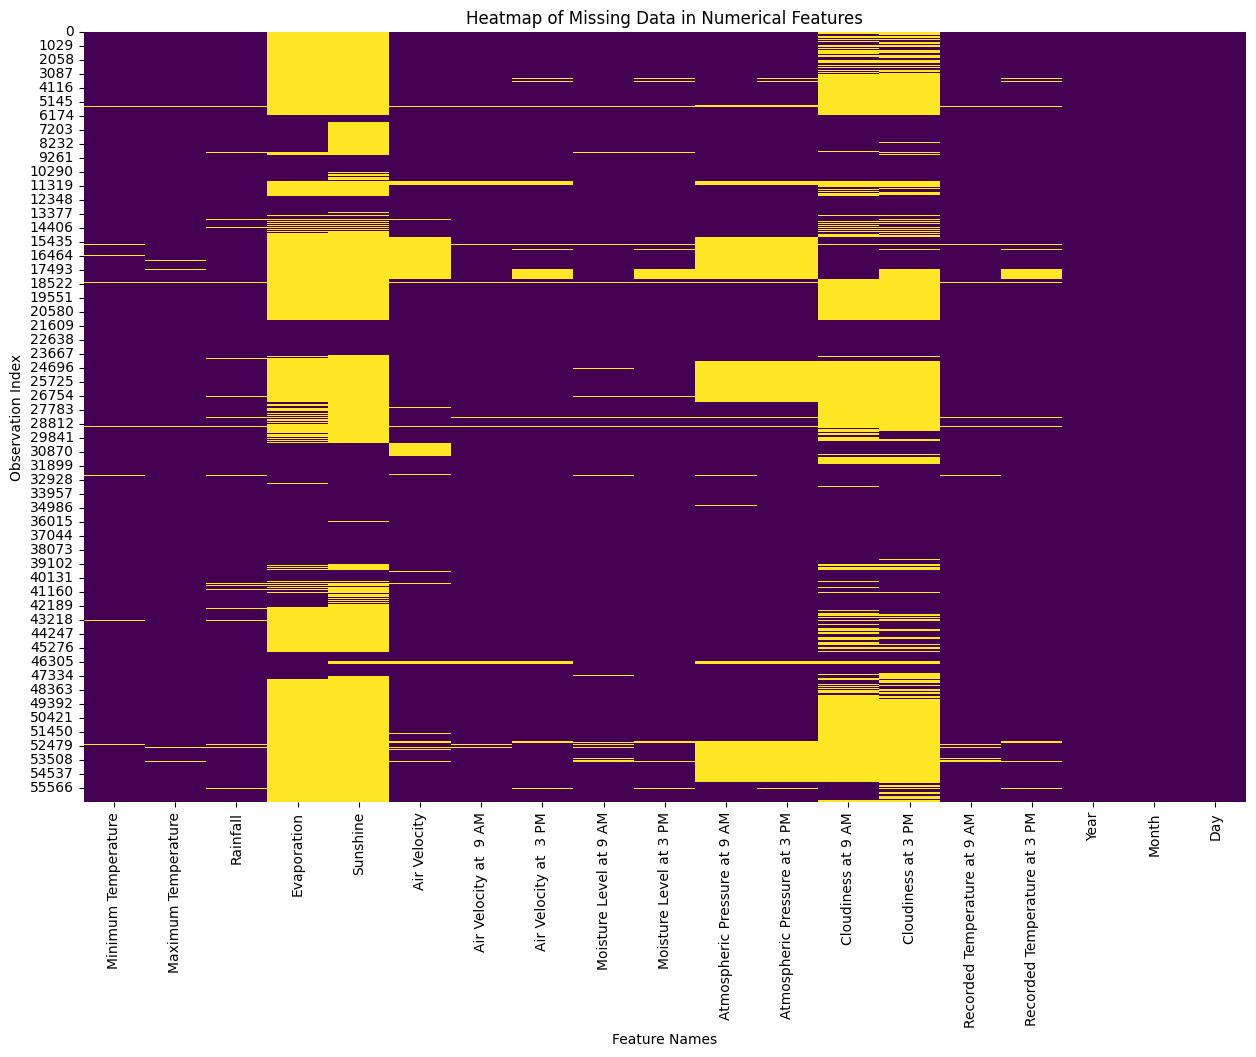

In [ ]:
# Create a heatmap to visualize missing values in numerical features
plt.figure(figsize=(15,10))
sns.heatmap(rain[numerical_features].isnull(), cmap='viridis', linecolor='white', cbar=False)

# Adding labels for clarity
plt.title('Heatmap of Missing Data in Numerical Features')
plt.xlabel('Feature Names')  # Label for columns
plt.ylabel('Observation Index')  # Label for rows
plt.show()


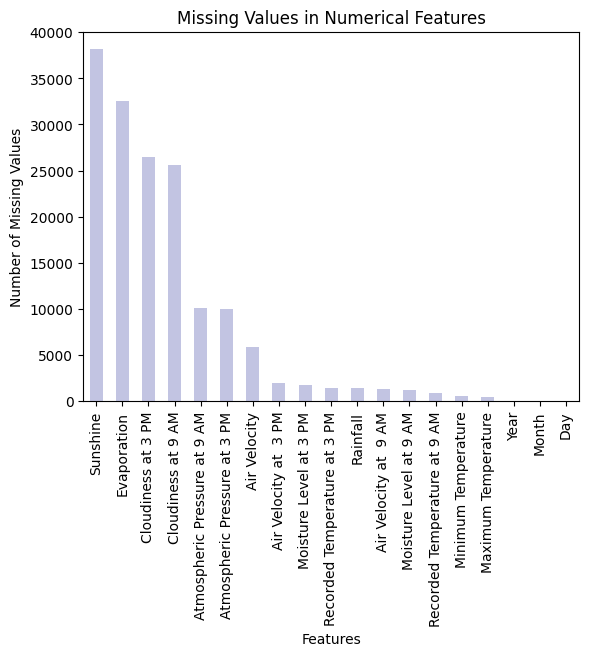

In [ ]:
# Visualize missing values in numerical features with a bar plot
missing_values_plot = rain[numerical_features].isnull().sum().sort_values(ascending=False)
missing_values_plot.plot(kind='bar', color='#C2C4E2')
plt.title('Missing Values in Numerical Features')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.show()


### 3.2.2 Outlier Detection in Numerical Features

Outliers can significantly affect the performance of many statistical models by skewing the results. Thus, detecting and potentially addressing outliers is an essential step in data preprocessing. Box plots are highly effective for this purpose as they visually summarize the distribution of data, highlighting potential outliers.

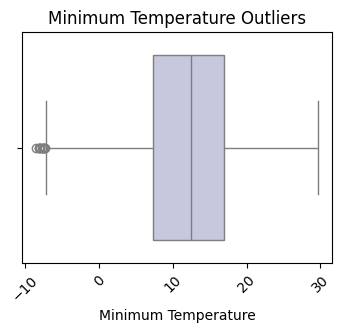

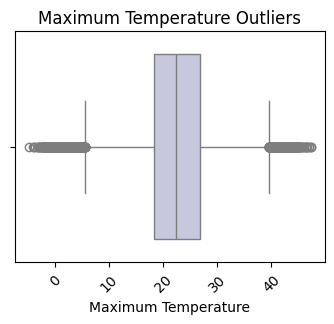

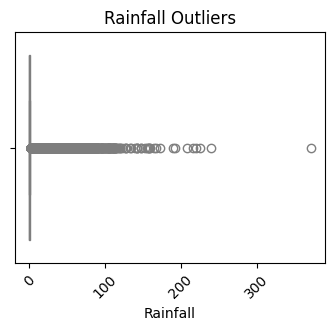

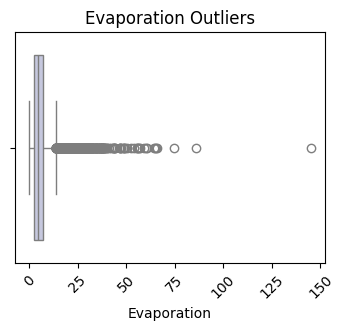

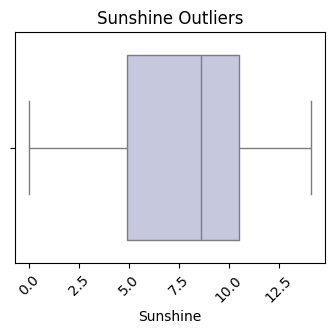

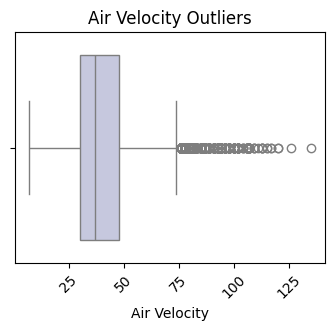

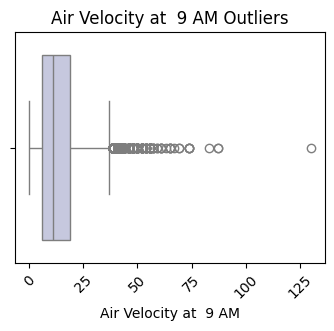

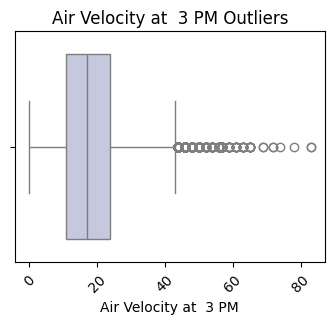

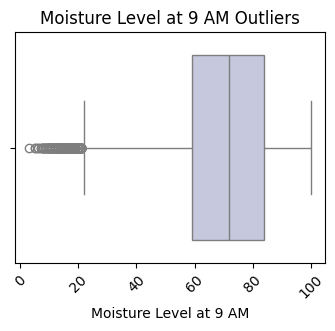

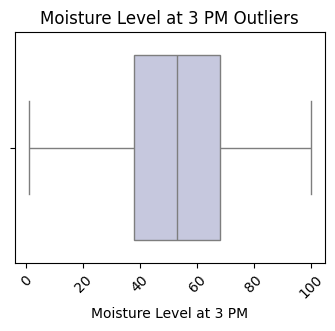

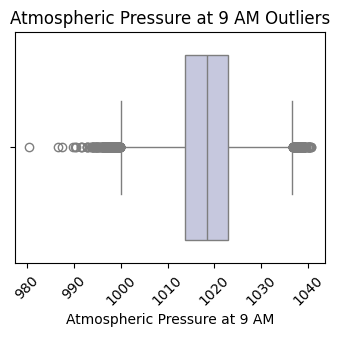

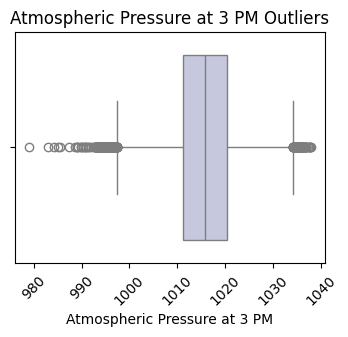

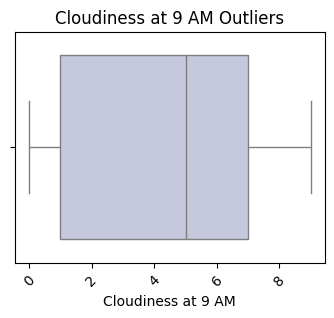

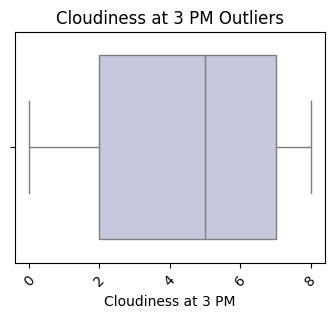

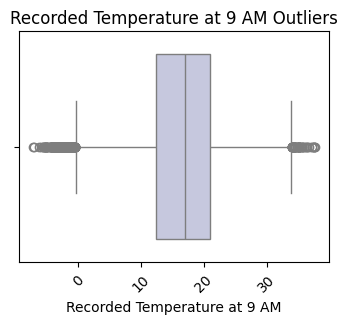

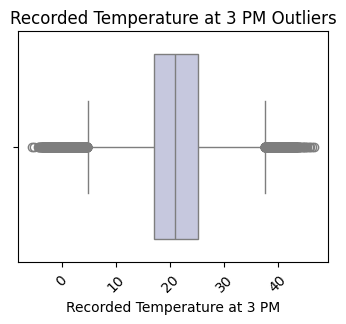

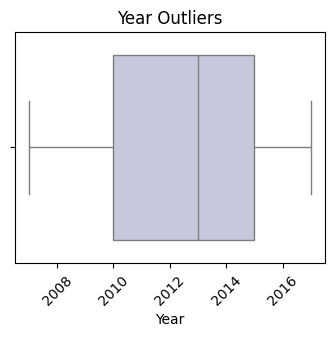

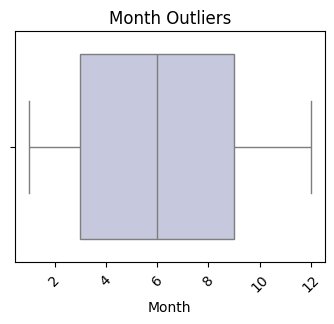

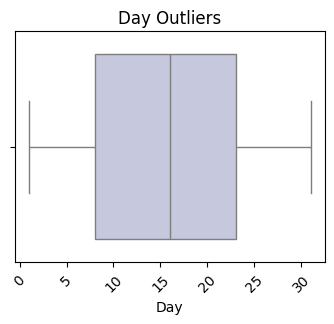

In [ ]:
# Generate box plots for each numerical feature to identify outliers, optimized for smaller display
for feature in numerical_features:
    plt.figure(figsize=(4, 3))
    sns.boxplot(x=rain[feature])
    plt.title(feature + ' Outliers')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
# checking for outliers using the statistical formulas:

rain[numerical_features].describe()

,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Air Velocity,Air Velocity at 9 AM,Air Velocity at 3 PM,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Year,Month,Day
count,55977.000000,56150.000000,55157.000000,24047.000000,18441.000000,50727.000000,55233.000000,54616.000000,55360.000000,54882.000000,46542.000000,46589.000000,31018.000000,30085.000000,55658.000000,55136.000000,56593.000000,56593.000000,56593.000000
mean,11.841653,22.614196,2.656582,5.528760,7.568706,39.408185,13.054551,17.848195,70.850217,53.063755,1018.320442,1015.785524,4.460055,4.537743,16.442468,21.179812,2012.638666,6.382892,15.712420
std,6.441874,6.831782,9.170838,4.483735,3.798647,14.140223,9.134150,9.286105,17.708315,20.817710,6.874519,6.774309,2.926803,2.733038,6.124326,6.655920,2.542243,3.431141,8.794695
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.300000,18.300000,0.000000,2.800000,4.900000,30.000000,6.000000,11.000000,59.000000,38.000000,1013.700000,1011.200000,1.000000,2.000000,12.400000,17.000000,2010.000000,3.000000,8.000000
50%,12.400000,22.400000,0.000000,4.600000,8.600000,37.000000,11.000000,17.000000,72.000000,53.000000,1018.400000,1015.800000,5.000000,5.000000,17.000000,20.900000,2013.000000,6.000000,16.000000
75%,17.000000,26.800000,0.800000,7.200000,10.500000,48.000000,19.000000,24.000000,84.000000,68.000000,1022.900000,1020.400000,7.000000,7.000000,21.000000,25.200000,2015.000000,9.000000,23.000000
max,29.700000,47.300000,371.000000,145.000000,14.100000,135.000000,130.000000,83.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.700000,46.700000,2017.000000,12.000000,31.000000


In [ ]:
# features which has outliers:

features_with_outliers = ['Minimum Temperature', 'Maximum Temperature', 'Rainfall', 'Evaporation', 'Air Velocity','Air Velocity at  9 AM', 'Air Velocity at  3 PM', 'Moisture Level at 9 AM', 'Atmospheric Pressure at 9 AM', 'Atmospheric Pressure at 3 PM', 'Recorded Temperature at 9 AM', 'Recorded Temperature at 3 PM']

#### 3.2.2.1 Replacing Outliers in Numerical Features Using IQR

Outliers can significantly impact statistical analyses and predictive modeling. To mitigate this issue, outliers in the dataset are replaced using the Interquartile Range (IQR) method. This technique involves calculating the IQR, which helps in defining what constitutes an "outlier" and then capping these outliers to reduce their impact.

In [ ]:
# Replacing outliers using IQR:

for feature in features_with_outliers:
    q1 = rain[feature].quantile(0.25)
    q3 = rain[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    rain.loc[rain[feature]<lower_limit,feature] = lower_limit
    rain.loc[rain[feature]>upper_limit,feature] = upper_limit

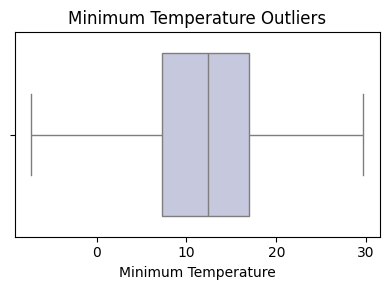

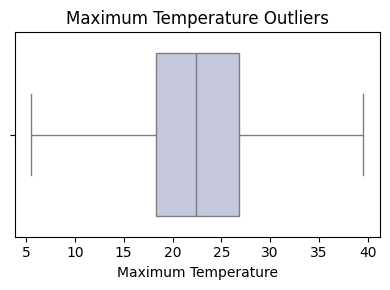

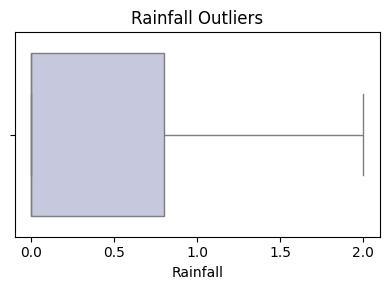

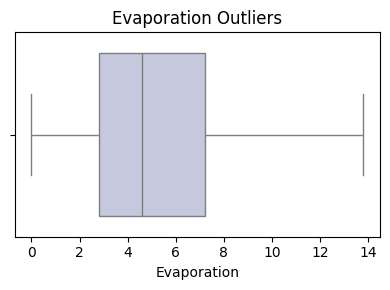

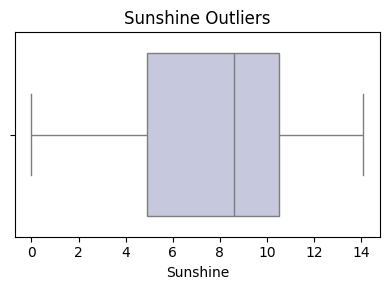

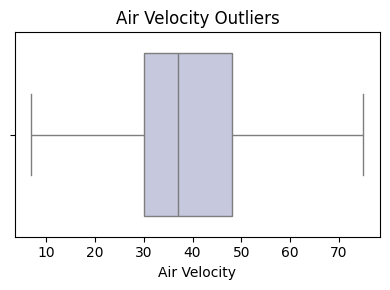

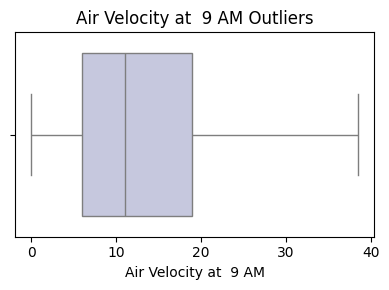

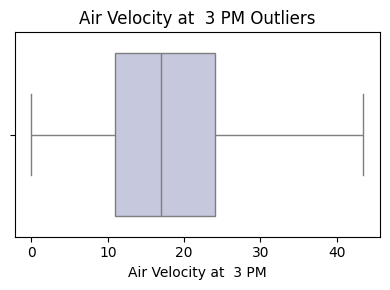

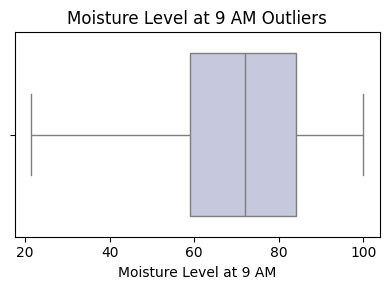

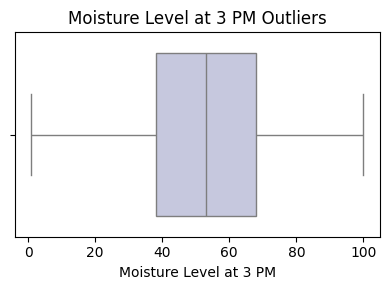

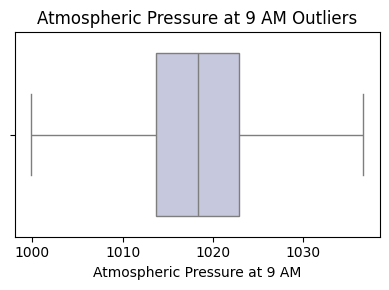

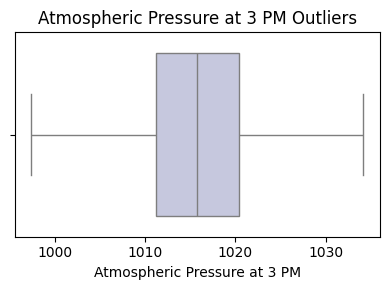

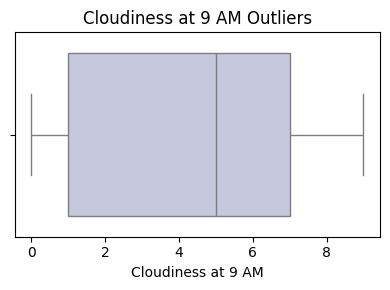

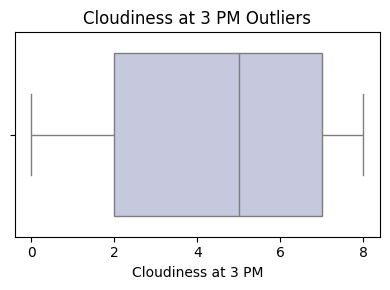

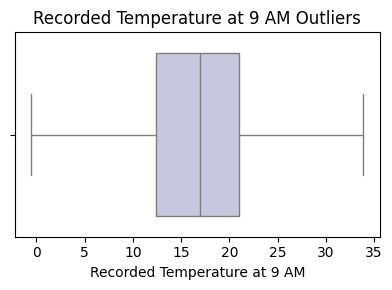

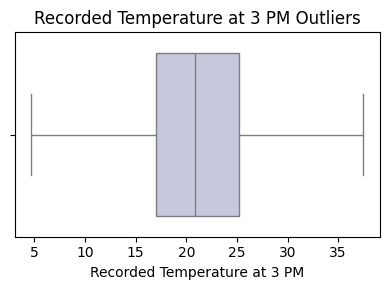

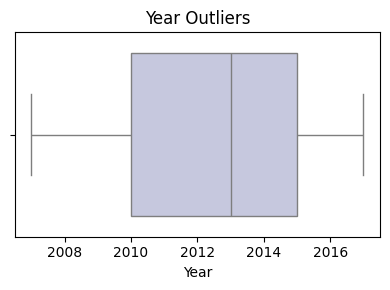

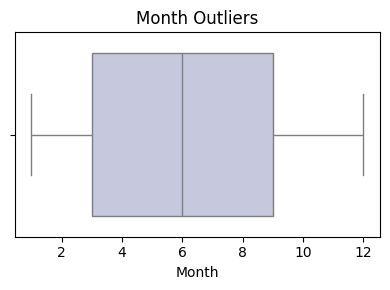

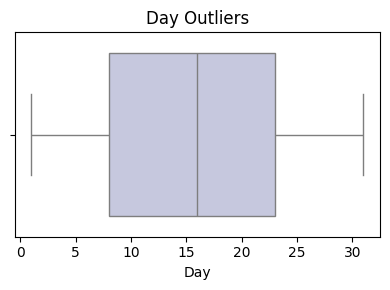

In [ ]:
for feature in numerical_features:
    plt.figure(figsize=(4, 3))  # Reduced figure size to 4x3 inches
    sns.boxplot(x=rain[feature])
    plt.title(feature + ' Outliers')
    plt.tight_layout()  # Ensure everything fits without overlapping
    plt.show()


In [ ]:
# list of numerical Features with Null values:

numerical_features_with_null = [feature for feature in numerical_features if rain[feature].isnull().sum()]
numerical_features_with_null

['Minimum Temperature',
 'Maximum Temperature',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'Air Velocity',
 'Air Velocity at  9 AM',
 'Air Velocity at  3 PM',
 'Moisture Level at 9 AM',
 'Moisture Level at 3 PM',
 'Atmospheric Pressure at 9 AM',
 'Atmospheric Pressure at 3 PM',
 'Cloudiness at 9 AM',
 'Cloudiness at 3 PM',
 'Recorded Temperature at 9 AM',
 'Recorded Temperature at 3 PM']

### 3.2.3 Imputation of Missing Values in Numerical Features Using Mean

Missing values in numerical features can disrupt statistical analysis and machine learning models. Imputing these missing values with the mean of the respective feature is a common strategy that helps maintain the overall distribution of the data.

In [ ]:
# Filling null values uisng mean:

for feature in numerical_features_with_null:
    mean_value = rain[feature].mean()
    rain[feature].fillna(mean_value,inplace=True)

In [ ]:
rain.isnull().sum()

Weather Station                 0
Minimum Temperature             0
Maximum Temperature             0
Rainfall                        0
Evaporation                     0
Sunshine                        0
Gust Trajectory                 0
Air Velocity                    0
Gust Trajectory at  9 AM        0
Gust Trajectory at  3 PM        0
Air Velocity at  9 AM           0
Air Velocity at  3 PM           0
Moisture Level at 9 AM          0
Moisture Level at 3 PM          0
Atmospheric Pressure at 9 AM    0
Atmospheric Pressure at 3 PM    0
Cloudiness at 9 AM              0
Cloudiness at 3 PM              0
Recorded Temperature at 9 AM    0
Recorded Temperature at 3 PM    0
Rain that day                   0
Rain the day after              0
Year                            0
Month                           0
Day                             0
dtype: int64

---

**As we can see there is no NULL value left in our DataFrame.**

---



In [ ]:
rain.head()

,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,...,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after,Year,Month,Day
0,Station 2,13.4,22.9,0.6,5.292739,7.568706,W,44.0,W,WNW,...,1007.1,8.000000,4.537743,16.9,21.8,No,No,2008,12,1
1,Station 2,7.4,25.1,0.0,5.292739,7.568706,WNW,44.0,NNW,WSW,...,1007.8,4.460055,4.537743,17.2,24.3,No,No,2008,12,2
2,Station 2,12.9,25.7,0.0,5.292739,7.568706,WSW,46.0,W,WSW,...,1008.7,4.460055,2.000000,21.0,23.2,No,No,2008,12,3
3,Station 2,9.2,28.0,0.0,5.292739,7.568706,NE,24.0,SE,E,...,1012.8,4.460055,4.537743,18.1,26.5,No,No,2008,12,4
4,Station 2,17.5,32.3,1.0,5.292739,7.568706,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,2008,12,5


# 4 Exploring the Rain Labels

To understand the distribution and relationships within the dataset, we explore the target label Rain the day after and related variable Rain that day. Visualizing these labels provides insights into their distributions and potential patterns related to weather stations.

## 4.1 Distribution of Rain the day after

The distribution of the Rain the day after label is visualized to assess class balance and identify potential imbalances which may impact modeling.

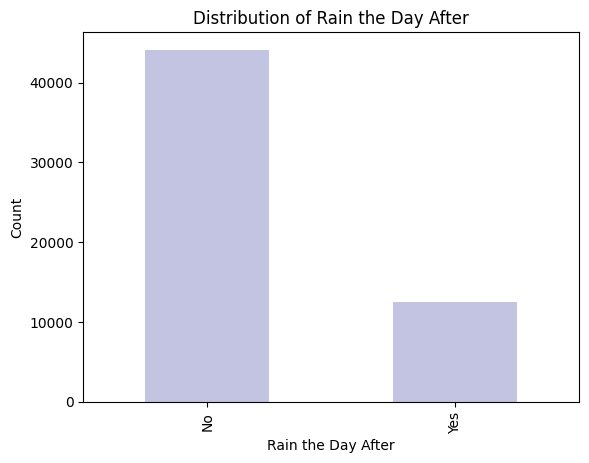

In [ ]:
# Visualize the distribution of the 'Rain the day after' label
rain['Rain the day after'].value_counts().plot(kind='bar', color='#C2C4E2')
plt.title('Distribution of Rain the Day After')
plt.xlabel('Rain the Day After')
plt.ylabel('Count')
plt.show()


## 4.2 Analysis of Rain that day

The Rain that day variable is examined to understand its distribution within the dataset.

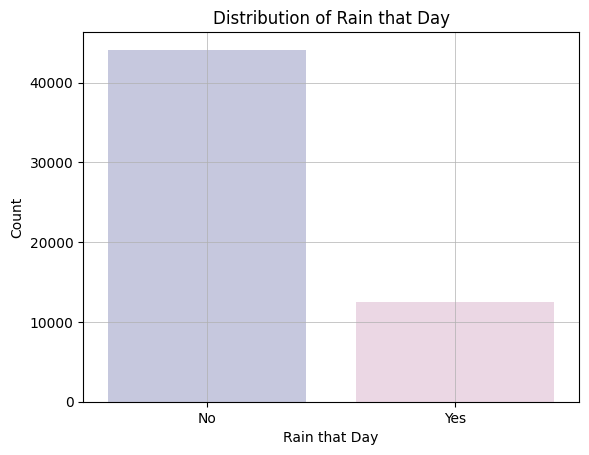

In [ ]:
# Visualize the distribution of the 'Rain that day' variable
sns.countplot(data=rain, x="Rain that day", palette=["#C2C4E2", "#EED4E5"])
plt.title('Distribution of Rain that Day')
plt.xlabel('Rain that Day')
plt.ylabel('Count')
plt.grid(linewidth=0.5)
plt.show()


## 4.3 Distribution by Weather Station

The relationship between Rain the day after and different weather stations is visualized to identify any station-specific patterns or biases.

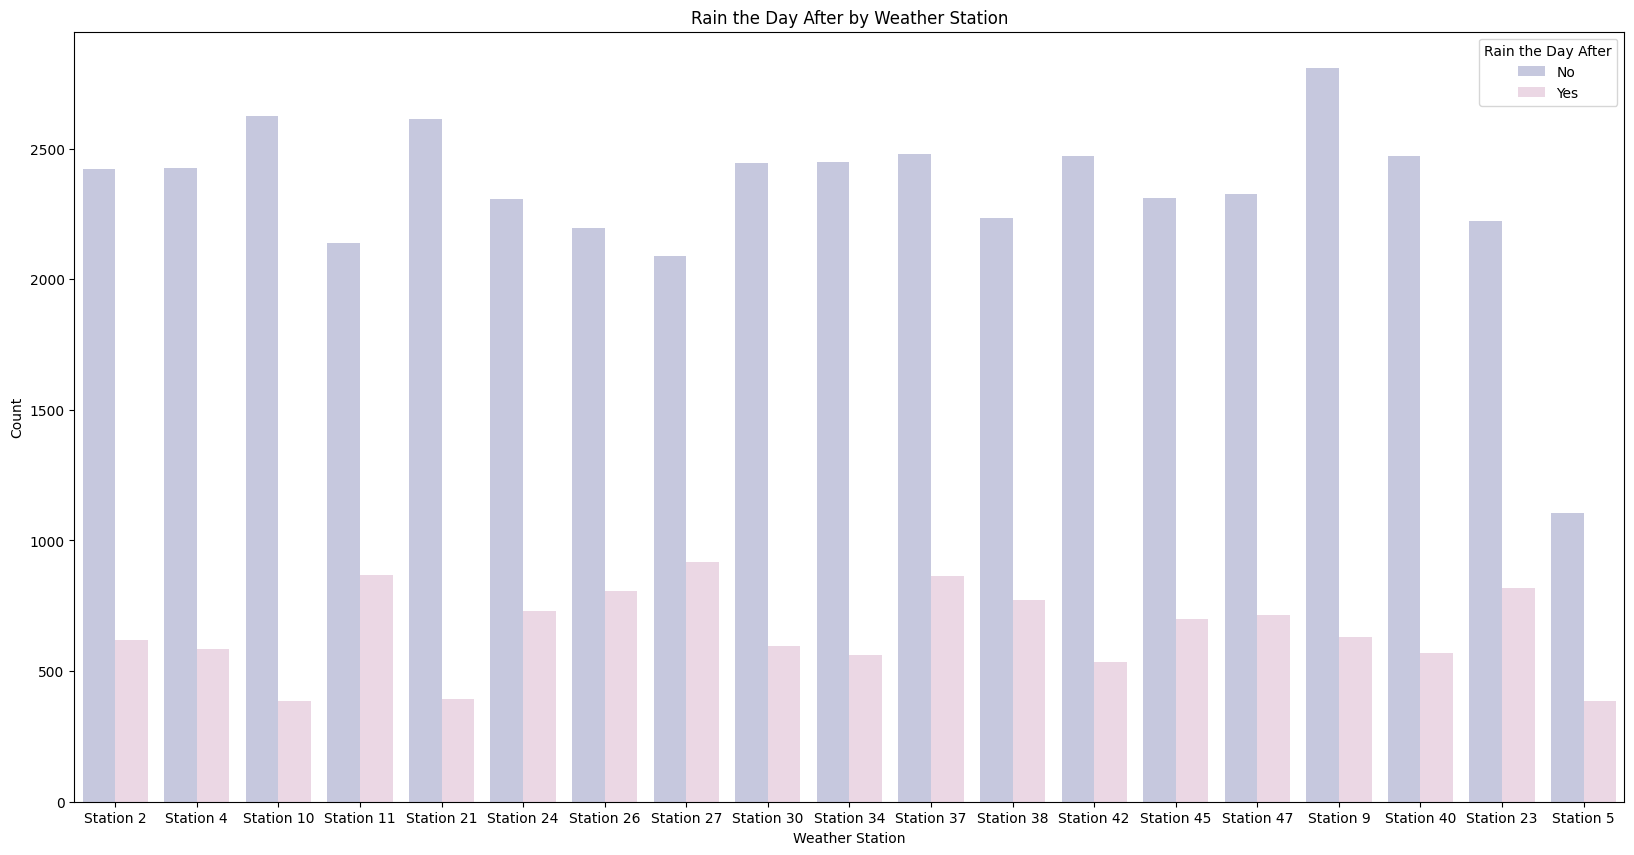

In [ ]:
# Visualize the relationship between 'Rain the day after' and different weather stations
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Weather Station", hue="Rain the day after", data=rain, palette=["#C2C4E2", "#EED4E5"])
plt.title('Rain the Day After by Weather Station')
plt.xlabel('Weather Station')
plt.ylabel('Count')
plt.legend(title='Rain the Day After', loc='upper right')
plt.show()


## 4.4 Exploring the Relationship Between Sunshine and Rainfall

Understanding the relationship between different weather variables is crucial for accurate predictive modeling. Here, we explore the relationship between Sunshine and Rainfall using a line plot, which can reveal trends and correlations between these two features.

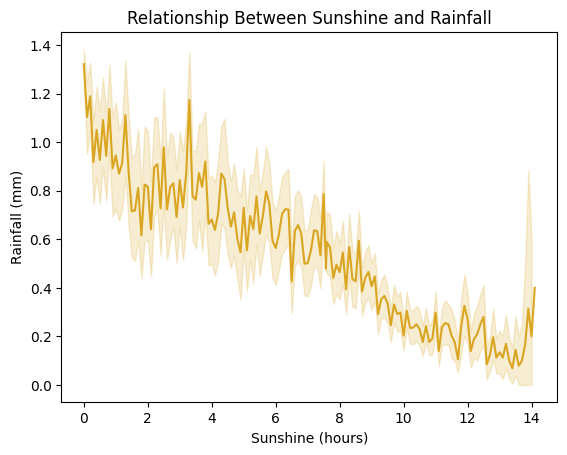

In [ ]:
# Visualize the relationship between Sunshine and Rainfall
sns.lineplot(data=rain, x='Sunshine', y='Rainfall', color='goldenrod')
plt.title('Relationship Between Sunshine and Rainfall')
plt.xlabel('Sunshine (hours)')
plt.ylabel('Rainfall (mm)')
plt.show()

## 4.5 Distribution Analysis of Numerical Features

Understanding the distribution of numerical features is a fundamental step in data exploration. Histograms provide a clear visual representation of the frequency distribution of these features, helping to identify their underlying patterns, skewness, and potential outliers.

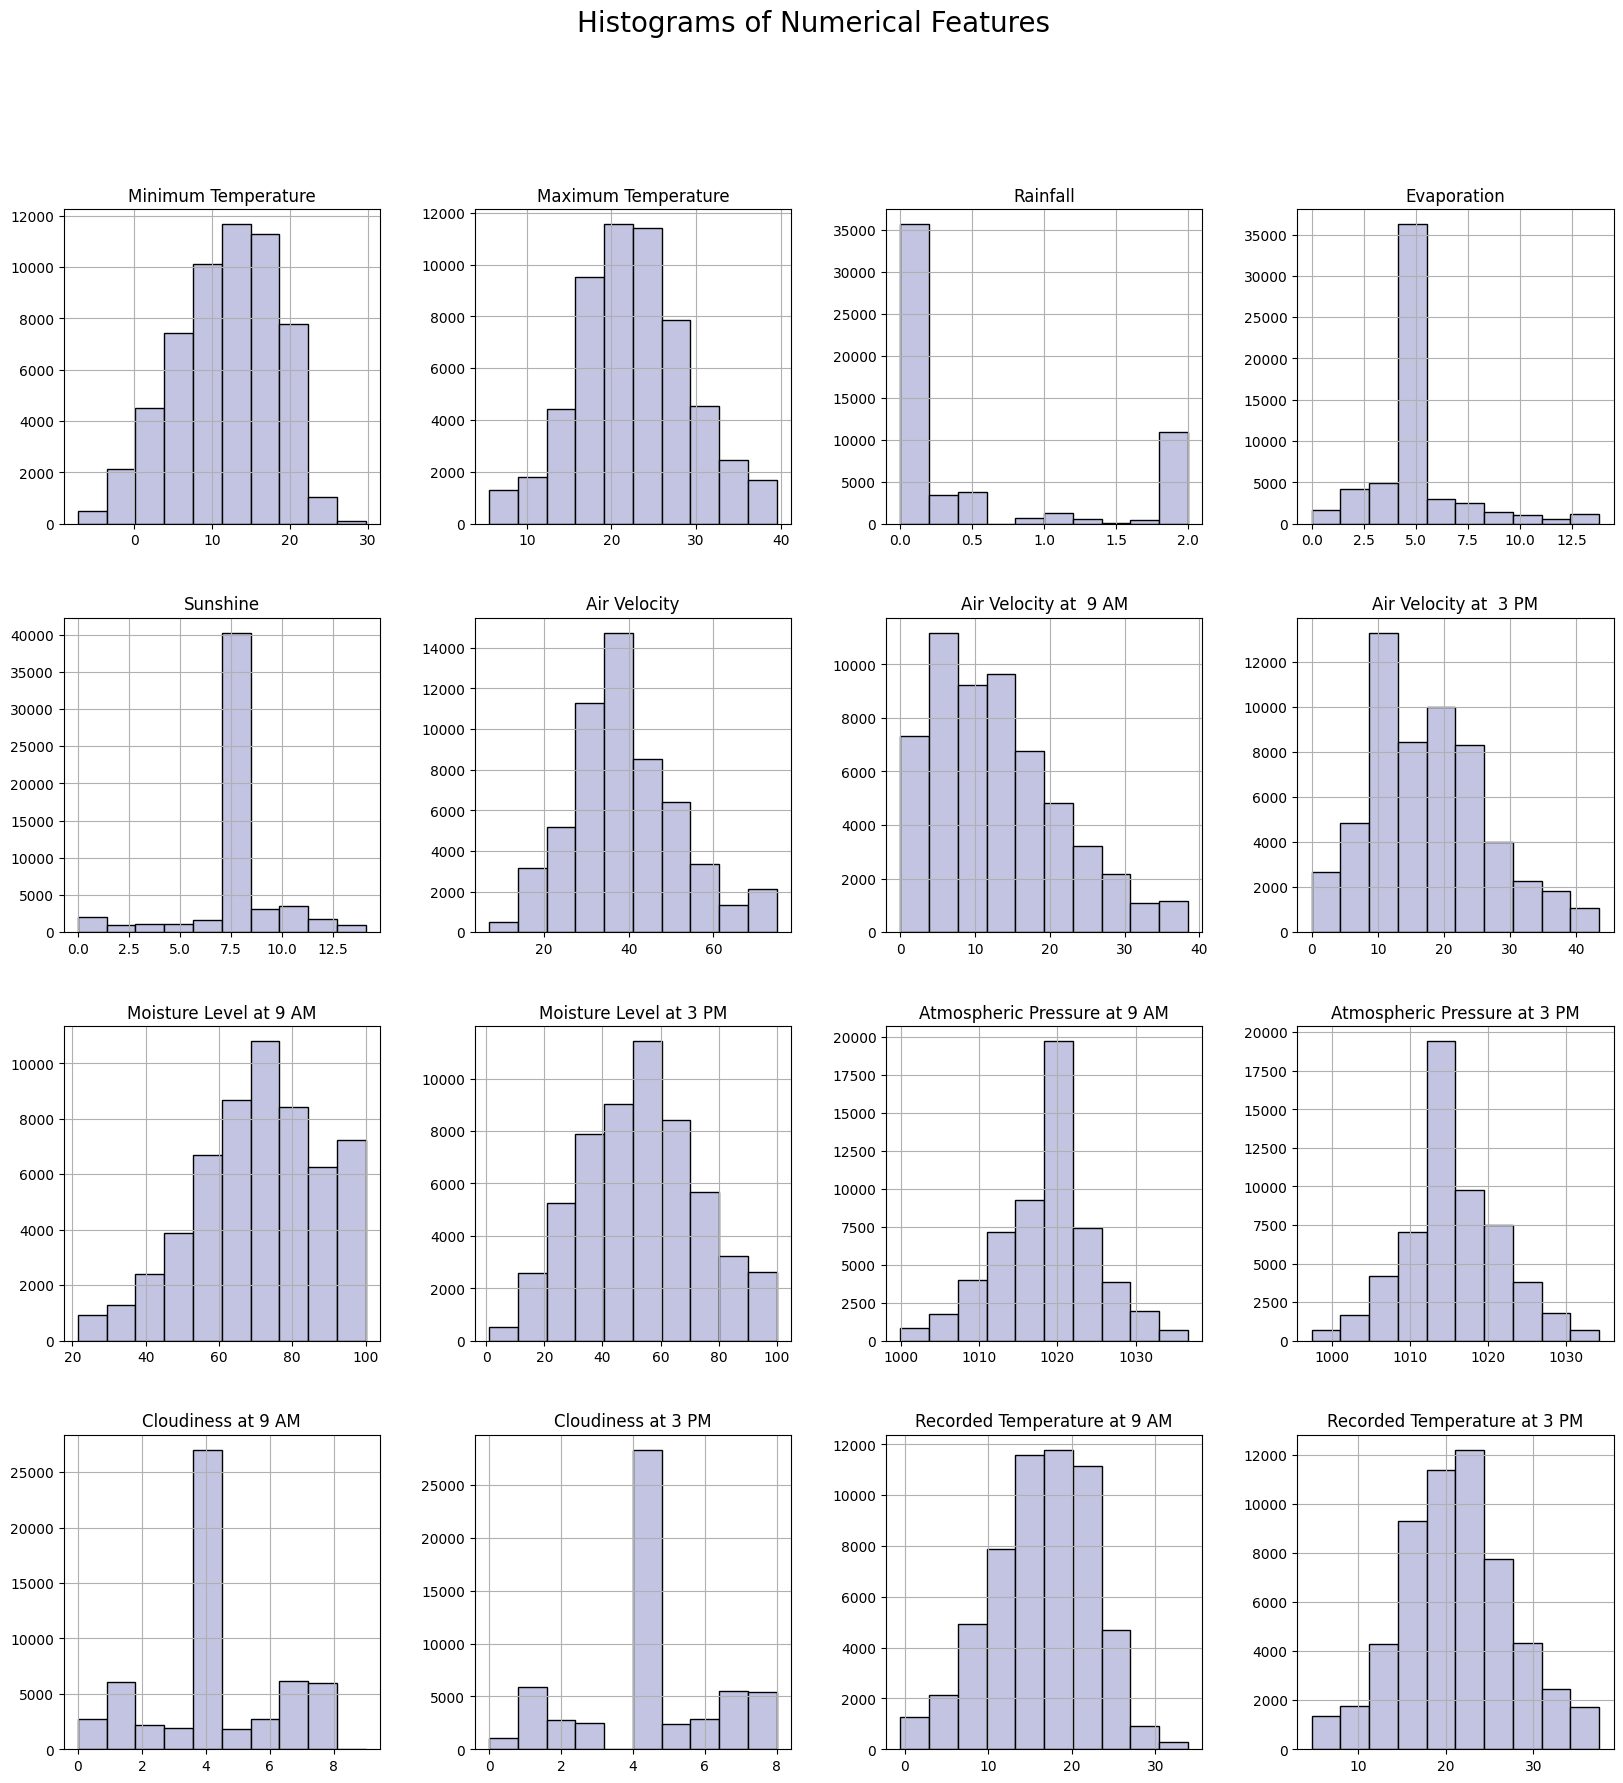

In [ ]:
# Define the numerical features to be visualized
num_features = ['Minimum Temperature', 'Maximum Temperature', 'Rainfall', 'Evaporation', 'Sunshine', 'Air Velocity',
                'Air Velocity at  9 AM', 'Air Velocity at  3 PM', 'Moisture Level at 9 AM', 'Moisture Level at 3 PM',
                'Atmospheric Pressure at 9 AM', 'Atmospheric Pressure at 3 PM', 'Cloudiness at 9 AM',
                'Cloudiness at 3 PM', 'Recorded Temperature at 9 AM', 'Recorded Temperature at 3 PM']

# Visualize the distribution of numerical features using histograms
rain[num_features].hist(bins=10, figsize=(20, 20), color='#C2C4E2', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=20)
plt.show()


## 4.6 Data Type Verification and Correlation Analysis
Understanding the data types of each column and analyzing the correlations among numerical features are essential steps in data preprocessing. This process helps in identifying relationships between features that can be crucial for predictive modeling and feature selection.

*Correlation is a statistic that helps to measure the strength of relationship between features.*

In [ ]:
# Check the data types of all columns in the DataFrame
print(rain.dtypes)

Weather Station                  object
Minimum Temperature             float64
Maximum Temperature             float64
Rainfall                        float64
Evaporation                     float64
Sunshine                        float64
Gust Trajectory                  object
Air Velocity                    float64
Gust Trajectory at  9 AM         object
Gust Trajectory at  3 PM         object
Air Velocity at  9 AM           float64
Air Velocity at  3 PM           float64
Moisture Level at 9 AM          float64
Moisture Level at 3 PM          float64
Atmospheric Pressure at 9 AM    float64
Atmospheric Pressure at 3 PM    float64
Cloudiness at 9 AM              float64
Cloudiness at 3 PM              float64
Recorded Temperature at 9 AM    float64
Recorded Temperature at 3 PM    float64
Rain that day                    object
Rain the day after               object
Year                              int32
Month                             int32
Day                               int32


In [ ]:
# Exclude non-numeric columns from correlation calculation
numeric_columns = rain.select_dtypes(include=['float64', 'int32'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Transpose the correlation matrix
transposed_correlation_matrix = correlation_matrix.T

# Display the transposed correlation matrix
transposed_correlation_matrix

,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Air Velocity,Air Velocity at 9 AM,Air Velocity at 3 PM,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Year,Month,Day
Minimum Temperature,1.000000,0.714307,0.114768,0.302006,-0.028657,0.222371,0.185843,0.196251,-0.155565,0.074358,-0.370666,-0.344442,0.103914,0.079155,0.903911,0.678364,0.063750,-0.227188,0.006066
Maximum Temperature,0.714307,1.000000,-0.183921,0.374480,0.195201,0.076388,-0.071924,0.042029,-0.363756,-0.457836,-0.294660,-0.352878,-0.161705,-0.134437,0.850362,0.966641,0.070844,-0.168005,0.008703
Rainfall,0.114768,-0.183921,1.000000,-0.128673,-0.214065,0.147029,0.149439,0.082321,0.366400,0.382019,-0.134860,-0.070396,0.266827,0.204011,-0.038590,-0.184649,-0.004241,-0.017024,-0.005982
Evaporation,0.302006,0.374480,-0.128673,1.000000,0.235172,0.174563,0.113972,0.086925,-0.311619,-0.227509,-0.216173,-0.219087,-0.104620,-0.069667,0.352406,0.365093,0.057350,-0.013105,-0.002375
Sunshine,-0.028657,0.195201,-0.214065,0.235172,1.000000,-0.029000,-0.024616,0.012639,-0.276211,-0.355822,-0.000196,-0.029184,-0.521000,-0.506779,0.092097,0.211717,0.001466,0.021229,0.002319
Air Velocity,0.222371,0.076388,0.147029,0.174563,-0.029000,1.000000,0.528565,0.650291,-0.216091,0.017172,-0.422888,-0.382716,0.033850,0.059829,0.201445,0.043567,-0.030550,0.070709,-0.015318
Air Velocity at 9 AM,0.185843,-0.071924,0.149439,0.113972,-0.024616,0.528565,1.000000,0.485645,-0.254996,0.071482,-0.177024,-0.107983,0.008379,0.047273,0.117338,-0.079229,-0.025407,0.041901,-0.013513
Air Velocity at 3 PM,0.196251,0.042029,0.082321,0.086925,0.012639,0.650291,0.485645,1.000000,-0.177887,0.030457,-0.268386,-0.223696,0.021341,0.004641,0.188696,0.017740,-0.025787,0.069362,-0.015248
Moisture Level at 9 AM,-0.155565,-0.363756,0.366400,-0.311619,-0.276211,-0.216091,-0.254996,-0.177887,1.000000,0.603615,0.154311,0.164574,0.365354,0.256082,-0.372147,-0.356147,0.003249,-0.121716,0.016874
Moisture Level at 3 PM,0.074358,-0.457836,0.382019,-0.227509,-0.355822,0.017172,0.071482,0.030457,0.603615,1.000000,0.042403,0.104670,0.380899,0.384238,-0.144117,-0.516375,0.005517,-0.057408,0.010423


### 4.6.1 Create heatmap

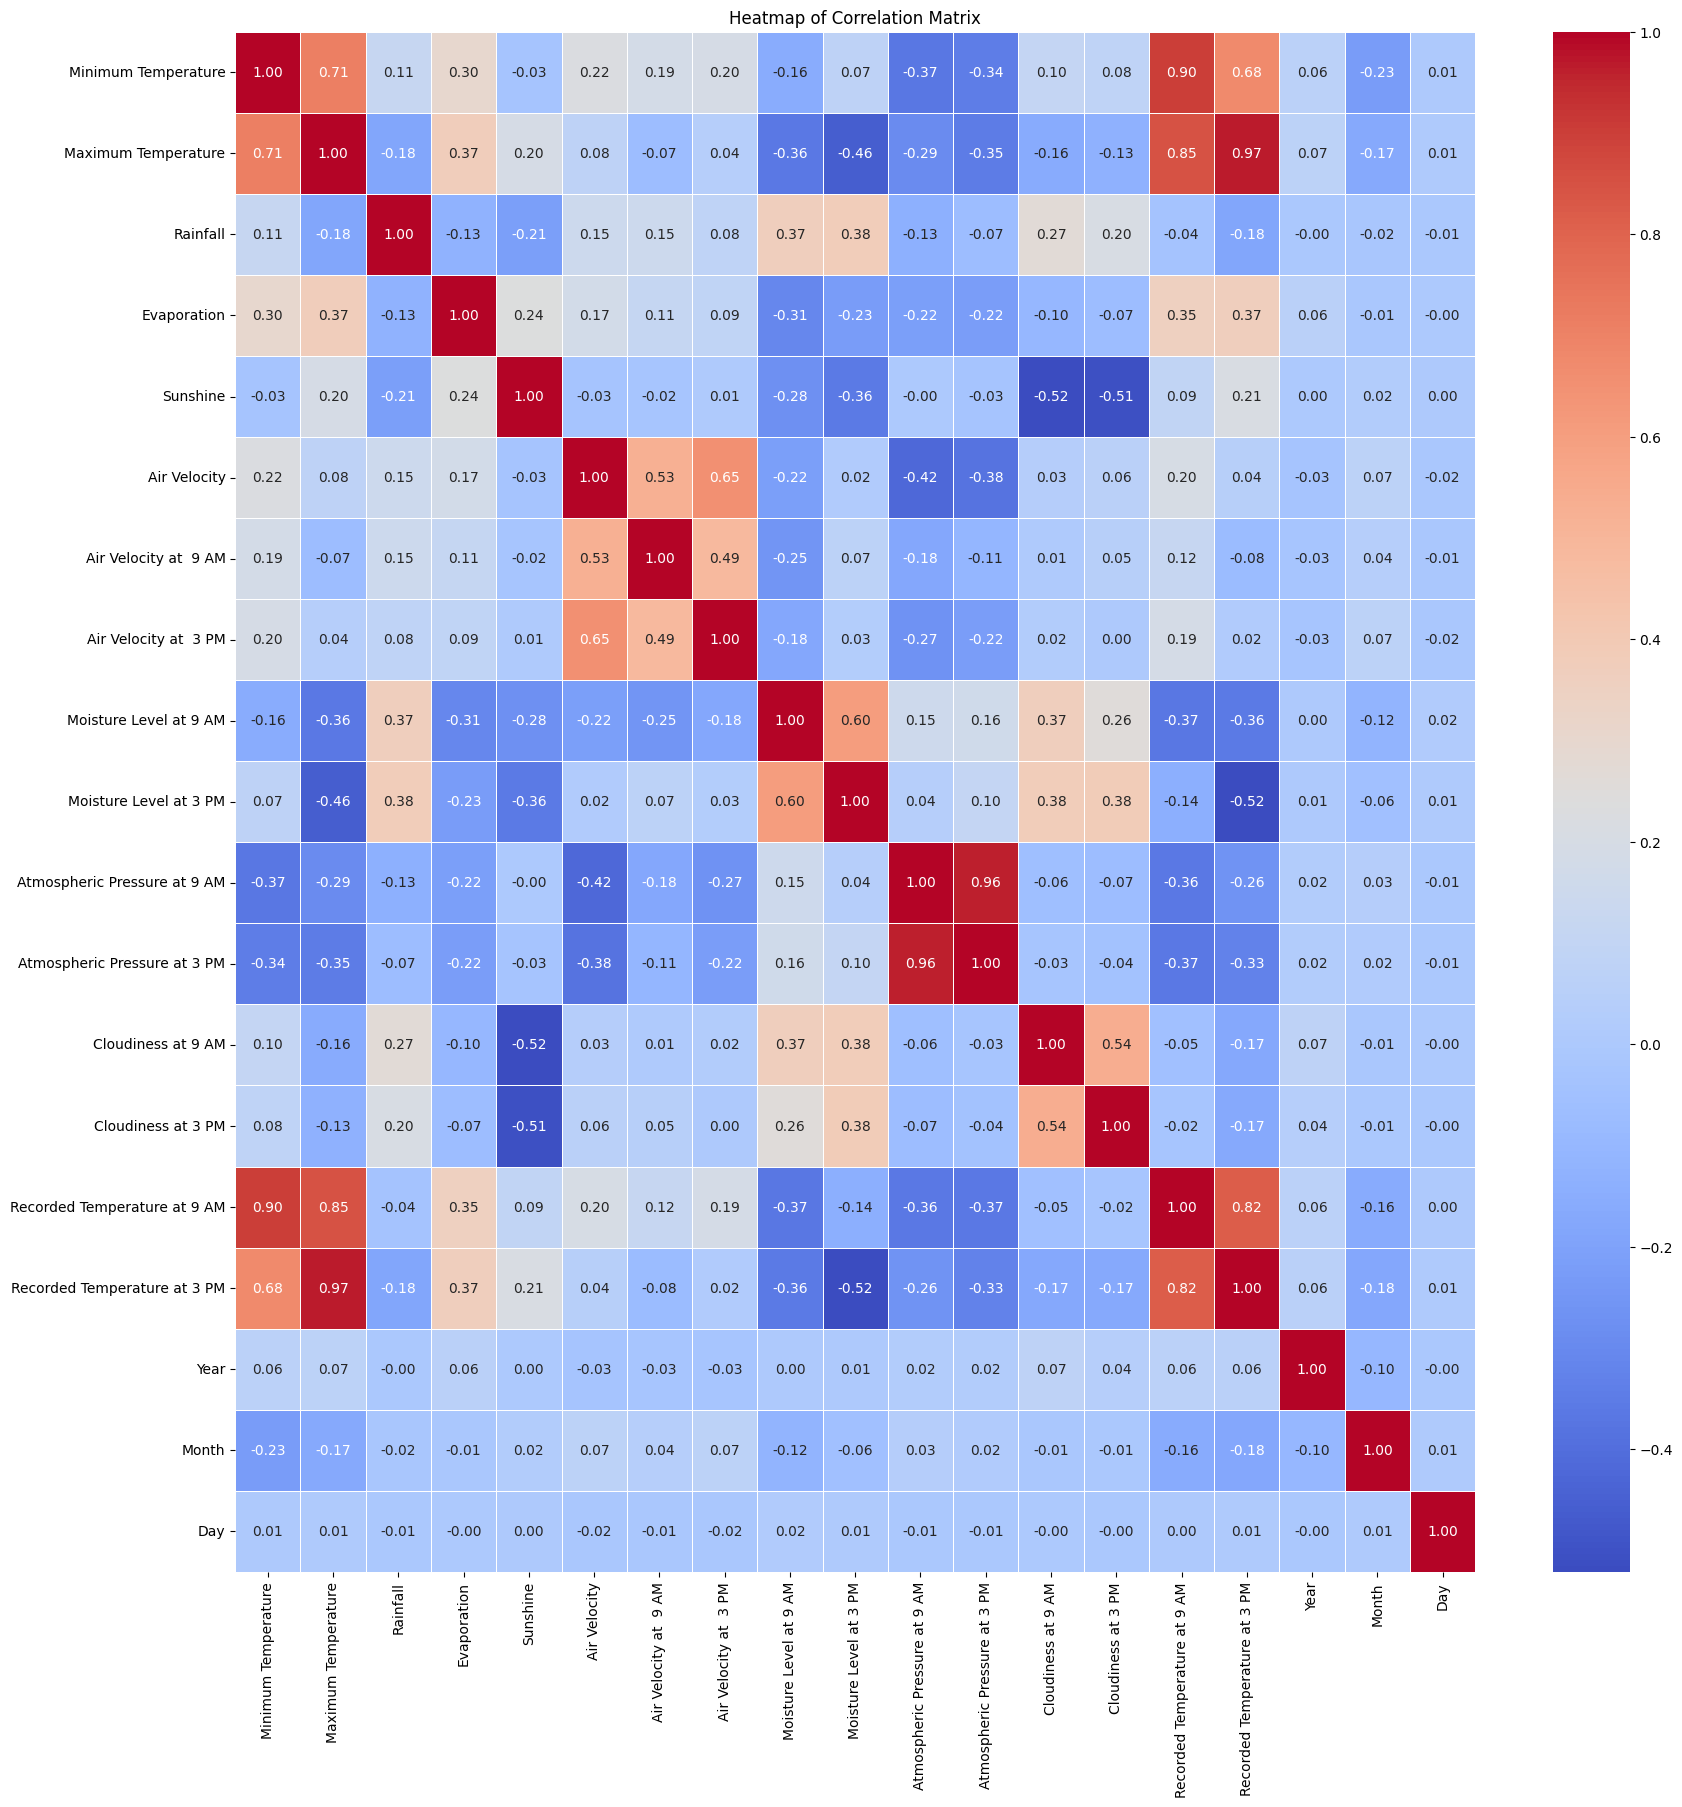

In [ ]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, linewidths=0.5, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

As we can see We have Correlation, But we Decided to Keep data as it is. I Googled it and they said If we are using inear models (e.g., linear regression or logistic regression) or Random Forests Correlation Features may Cause error.
I visited these sites:
1. [What we should do with highly correlated features?](https://stackoverflow.com/questions/65302136/what-we-should-do-with-highly-correlated-features)
2. [What should I do if I have very little correlation between my all feature variable and target variable on my dataset?](https://www.quora.com/What-should-I-do-if-I-have-very-little-correlation-between-my-all-feature-variable-and-target-variable-on-my-dataset)
3. [In supervised learning, why is it bad to have correlated features?](https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features)
4. [https://medium.com/@abdallahashraf90x/all-you-need-to-know-about-correlation-for-machine-learning-e249fec292e9](https://medium.com/@abdallahashraf90x/all-you-need-to-know-about-correlation-for-machine-learning-e249fec292e9)

and from things I read we can only delete datas if there is a column with high Correlation(we Don't have it here) :D


# 5 Encoding

In [ ]:
rain.head()

,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,...,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after,Year,Month,Day
0,Station 2,13.4,22.9,0.6,5.292739,7.568706,W,44.0,W,WNW,...,1007.1,8.000000,4.537743,16.9,21.8,No,No,2008,12,1
1,Station 2,7.4,25.1,0.0,5.292739,7.568706,WNW,44.0,NNW,WSW,...,1007.8,4.460055,4.537743,17.2,24.3,No,No,2008,12,2
2,Station 2,12.9,25.7,0.0,5.292739,7.568706,WSW,46.0,W,WSW,...,1008.7,4.460055,2.000000,21.0,23.2,No,No,2008,12,3
3,Station 2,9.2,28.0,0.0,5.292739,7.568706,NE,24.0,SE,E,...,1012.8,4.460055,4.537743,18.1,26.5,No,No,2008,12,4
4,Station 2,17.5,32.3,1.0,5.292739,7.568706,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,2008,12,5


In [ ]:
categorical_features

['Weather Station',
 'Gust Trajectory',
 'Gust Trajectory at  9 AM',
 'Gust Trajectory at  3 PM',
 'Rain that day',
 'Rain the day after']

## 5.1 One-Hot Encoding of Categorical Features

To prepare the dataset for machine learning models, categorical features must be converted into a numerical format. One-hot encoding is employed to transform these categorical variables into a format that can be used effectively by most machine learning algorithms.

In [ ]:
# One-hot encode categorical features
rain_proc = pd.get_dummies(data=rain, columns=['Rain that day', 'Gust Trajectory', 'Gust Trajectory at  9 AM', 'Gust Trajectory at  3 PM'])
rain_proc

,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Air Velocity,Air Velocity at 9 AM,Air Velocity at 3 PM,Moisture Level at 9 AM,...,Gust Trajectory at 3 PM_NNW,Gust Trajectory at 3 PM_NW,Gust Trajectory at 3 PM_S,Gust Trajectory at 3 PM_SE,Gust Trajectory at 3 PM_SSE,Gust Trajectory at 3 PM_SSW,Gust Trajectory at 3 PM_SW,Gust Trajectory at 3 PM_W,Gust Trajectory at 3 PM_WNW,Gust Trajectory at 3 PM_WSW
0,Station 2,13.4,22.9,0.6,5.292739,7.568706,44.0,20.0,24.0,71.0,...,False,False,False,False,False,False,False,False,True,False
1,Station 2,7.4,25.1,0.0,5.292739,7.568706,44.0,4.0,22.0,44.0,...,False,False,False,False,False,False,False,False,False,True
2,Station 2,12.9,25.7,0.0,5.292739,7.568706,46.0,19.0,26.0,38.0,...,False,False,False,False,False,False,False,False,False,True
3,Station 2,9.2,28.0,0.0,5.292739,7.568706,24.0,11.0,9.0,45.0,...,False,False,False,False,False,False,False,False,False,False
4,Station 2,17.5,32.3,1.0,5.292739,7.568706,41.0,7.0,20.0,82.0,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56588,Station 5,8.8,22.1,0.0,5.292739,7.568706,28.0,2.0,11.0,86.0,...,False,False,False,False,False,False,False,False,False,False
56589,Station 5,9.0,27.9,0.0,5.292739,7.568706,50.0,17.0,28.0,69.0,...,False,False,False,False,False,False,False,False,False,False
56590,Station 5,16.2,32.9,0.0,5.292739,7.568706,69.0,33.0,43.5,35.0,...,True,False,False,False,False,False,False,False,False,False
56591,Station 5,10.5,18.8,2.0,5.292739,7.568706,74.0,9.0,35.0,91.0,...,False,False,False,False,False,False,False,True,False,False


## 5.2 Binary Encoding of Target Variable and Selection of Key Columns

To facilitate numerical analysis and modeling, the binary target variable Rain the day after is encoded from 'No'/'Yes' to 0/1. This transformation ensures that the target variable is in a suitable format for machine learning algorithms.

In [ ]:
# Replace 'No'/'Yes' with 0/1 in the dataset
rain_proc.replace(['No', 'Yes'], [0, 1], inplace=True)

# Select and display specific columns for further analysis
selected_columns = rain_proc[['Year', 'Month', 'Day', 'Rain the day after']]
selected_columns.head()


,Year,Month,Day,Rain the day after
0,2008,12,1,0
1,2008,12,2,0
2,2008,12,3,0
3,2008,12,4,0
4,2008,12,5,0


## 5.3 Encoding Categorical Data to Numerical Values

To facilitate numerical analysis and machine learning modeling, categorical data needs to be converted into numerical format. The encode_data function is designed to create a mapping dictionary for this purpose, systematically replacing categorical values with unique numerical identifiers.



In [ ]:
def encode_data(feature_name):
    '''
    Function to map categorical data to numerical data.

    Parameters:
    feature_name (str): The name of the categorical feature to be encoded.

    Returns:
    dict: A dictionary mapping categorical values to numerical values.
    '''

    mapping_dict = {}
    unique_values = list(rain[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict

## 5.4 Encoding the 'Weather Station' Feature

To prepare the 'Weather Station' feature for numerical analysis and machine learning models, it is essential to convert its categorical values into numerical format. The encode_data function is used to generate a mapping dictionary for this transformation.

In [ ]:
# Encode the 'Weather Station' feature
rain_proc['Weather Station'].replace(encode_data('Weather Station'), inplace = True)

{'Station 2': 0, 'Station 4': 1, 'Station 10': 2, 'Station 11': 3, 'Station 21': 4, 'Station 24': 5, 'Station 26': 6, 'Station 27': 7, 'Station 30': 8, 'Station 34': 9, 'Station 37': 10, 'Station 38': 11, 'Station 42': 12, 'Station 45': 13, 'Station 47': 14, 'Station 9': 15, 'Station 40': 16, 'Station 23': 17, 'Station 5': 18}


In [ ]:
rain_proc.head()

,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Air Velocity,Air Velocity at 9 AM,Air Velocity at 3 PM,Moisture Level at 9 AM,...,Gust Trajectory at 3 PM_NNW,Gust Trajectory at 3 PM_NW,Gust Trajectory at 3 PM_S,Gust Trajectory at 3 PM_SE,Gust Trajectory at 3 PM_SSE,Gust Trajectory at 3 PM_SSW,Gust Trajectory at 3 PM_SW,Gust Trajectory at 3 PM_W,Gust Trajectory at 3 PM_WNW,Gust Trajectory at 3 PM_WSW
0,0,13.4,22.9,0.6,5.292739,7.568706,44.0,20.0,24.0,71.0,...,False,False,False,False,False,False,False,False,True,False
1,0,7.4,25.1,0.0,5.292739,7.568706,44.0,4.0,22.0,44.0,...,False,False,False,False,False,False,False,False,False,True
2,0,12.9,25.7,0.0,5.292739,7.568706,46.0,19.0,26.0,38.0,...,False,False,False,False,False,False,False,False,False,True
3,0,9.2,28.0,0.0,5.292739,7.568706,24.0,11.0,9.0,45.0,...,False,False,False,False,False,False,False,False,False,False
4,0,17.5,32.3,1.0,5.292739,7.568706,41.0,7.0,20.0,82.0,...,False,True,False,False,False,False,False,False,False,False


# 6 Split Data into Training and Testing Set

## 6.1 Separation of Features and Target Variable

To prepare the dataset for machine learning model training, it is essential to separate the features (independent variables) from the target variable (dependent variable). This step ensures that the dataset is correctly structured for model training and evaluation.

In [ ]:
# Separate features and target variable
features = rain_proc.drop(columns='Rain the day after', axis=1)
Y = rain_proc['Rain the day after']

In [ ]:
rain.drop('Weather Station', axis=1, inplace=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)

# 7 Training and Evaluation of K-Nearest Neighbors (KNN) Classifier

The K-Nearest Neighbors (KNN) algorithm is used to classify the target variable based on the feature set. This section outlines the steps taken to train the KNN model, make predictions, and evaluate its performance using various metrics.

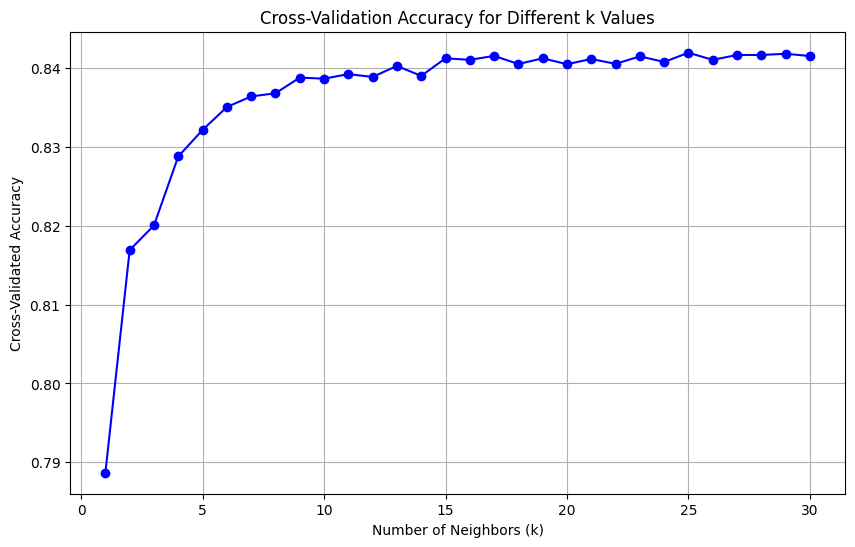

The best k value is 25 with a cross-validated accuracy of 0.8420


In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Define the range of k values to test
k_range = range(1, 31)
k_scores = []

# Perform cross-validation for each value of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', color='blue')
plt.title('Cross-Validation Accuracy for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

# Determine the best k
best_k = k_range[k_scores.index(max(k_scores))]
print(f'The best k value is {best_k} with a cross-validated accuracy of {max(k_scores):.4f}')


In [ ]:
# Train and evaluate K-Nearest Neighbors (KNN) classifier
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
knn_predictions = knn.predict(x_test)

In [ ]:
# Calculate performance metrics
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions, average='weighted')
knn_recall = recall_score(y_test, knn_predictions, average='weighted')
knn_f1_score = f1_score(y_test, knn_predictions, average='weighted')

# Display performance metrics
print('KNN Accuracy: ', knn_accuracy)
print('KNN Precision: ', knn_precision)
print('KNN Recall: ', knn_recall)
print('KNN F1 Score: ', knn_f1_score)

KNN Accuracy:  0.8456577436169272
KNN Precision:  0.8370667809321363
KNN Recall:  0.8456577436169272
KNN F1 Score:  0.8288871289986172


## 7.1 Training, Validation, and Testing of K-Nearest Neighbors (KNN) Classifier

The K-Nearest Neighbors (KNN) algorithm is evaluated using separate training, validation, and test sets. This comprehensive evaluation provides insights into the model's performance at different stages of the training process.

In [ ]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)

# Further split the training set into training and validation sets
x_train1, x_val, y_train1, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=10)

# Train the KNN classifier on the training set
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train1, y_train1)

# Evaluate the KNN classifier on the training set
knn_predictions_train = knn.predict(x_train1)
knn_accuracy_train = accuracy_score(y_train1, knn_predictions_train)

# Evaluate the KNN classifier on the validation set
knn_predictions_val = knn.predict(x_val)
knn_accuracy_val = accuracy_score(y_val, knn_predictions_val)

# Retrain the KNN classifier on the combined training and validation sets
knn.fit(x_train, y_train)

# Evaluate the KNN classifier on the test set
knn_predictions_test = knn.predict(x_test)
knn_accuracy_test = accuracy_score(y_test, knn_predictions_test)

# Display accuracy for different sets
print('KNN Accuracy for training set: ', knn_accuracy_train)
print('KNN Accuracy for validation set: ', knn_accuracy_val)
print('KNN Accuracy for test set: ', knn_accuracy_test)


KNN Accuracy for training set:  0.8489913120306287
KNN Accuracy for validation set:  0.8460689045936396
KNN Accuracy for test set:  0.8456577436169272


**Procedure Explanation:**
- **Data Splitting**: The dataset is split into training (80%) and test (20%) sets. The training set is further split into training (90% of 80%) and validation (10% of 80%) sets.
- **Model Training**: The KNN classifier is trained on the initial training set (`x_train1`, `y_train1`).
- **Evaluation on Training Set**: Predictions are made on the training set, and accuracy is calculated.
- **Evaluation on Validation Set**: Predictions are made on the validation set, and accuracy is calculated.
- **Retraining and Final Evaluation**: The KNN classifier is retrained on the combined training and validation sets (`x_train`, `y_train`), and final predictions are made on the test set.

**Implications for Model Performance:**
- Evaluating the KNN model on separate training, validation, and test sets provides a comprehensive understanding of its performance and robustness.
- The validation set accuracy helps in tuning the model to achieve better performance and generalization.


## 7.2 Balancing Data Using Oversampling with Cross Validation



### 7.2.1 Introduction

In machine learning, class imbalance can pose challenges for predictive modeling, particularly in classification tasks. In this section, we explore the use of oversampling with SMOTE (Synthetic Minority Over-sampling Technique) coupled with cross-validation to address class imbalance.



### 7.2.2 Methodology



#### 7.2.2.1 Data Splitting

The dataset is split into training and testing sets using the `train_test_split` function from the `sklearn.model_selection` module. Stratification based on the target variable ensures that the class distribution is preserved in both sets.



#### 7.2.2.2 Oversampling with SMOTE

To address class imbalance, we employ SMOTE (Synthetic Minority Over-sampling Technique) to oversample the minority class. This is achieved using the `SMOTE` function from the `imblearn.over_sampling` module, followed by the `fit_resample` method to obtain a balanced dataset.



#### 7.2.2.3 Cross-Validation

Stratified k-fold cross-validation is performed to assess the model's performance. We use the `StratifiedKFold` function to split the data into k folds while maintaining class proportions. The `cross_val_score` function calculates accuracy scores for each fold using the K-Nearest Neighbors (KNN) classifier with the optimal k value.


In [ ]:
# Balancing data using oversampling with cross validation
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE

x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10, stratify=Y)

smote = SMOTE(random_state=10)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

knn = KNeighborsClassifier(n_neighbors=best_k)

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

cross_val_scores = cross_val_score(knn, x_train_balanced, y_train_balanced, cv=skf, scoring='accuracy')

print('Cross-validation accuracies: ', cross_val_scores)
print('Mean cross-validation accuracy: ', np.mean(cross_val_scores))

Cross-validation accuracies:  [0.80389381 0.8060177  0.80678278 0.80515435 0.80395072]
Mean cross-validation accuracy:  0.8051598709784138


In [ ]:
knn.fit(x_train_balanced, y_train_balanced)

knn_test_predictions = knn.predict(x_test)
knn_accuracy_test = accuracy_score(y_test, knn_test_predictions)

print('KNN Accuracy for test set: ', knn_accuracy_test)

KNN Accuracy for test set:  0.7470624613481757



### 7.2.3 Results



#### 7.2.3.1 Cross-Validation Accuracies

The accuracy scores obtained for each fold during cross-validation are as follows: [0.8039, 0.8060, 0.8068, 0.8052, 0.8040]. These scores reflect the model's performance on different subsets of the data.



#### 7.2.3.2 Mean Cross-Validation Accuracy

The mean cross-validation accuracy, calculated as the average of the accuracy scores across folds, is approximately 0.8052. This metric provides an overall measure of the model's performance on unseen data.



### 7.2.4 KNN Accuracy for Test Set

The accuracy of the KNN classifier on the test set is 0.7471. This value indicates the model's performance on previously unseen data and serves as a practical evaluation metric.



## 7.3 Balancing Data Using Undersampling



### 7.3.1 Introduction

While oversampling techniques like SMOTE are effective for addressing class imbalance by generating synthetic samples for the minority class, undersampling methods involve reducing the number of instances in the majority class. In this section, we explore the use of undersampling with RandomUnderSampler to balance the dataset.



### 7.3.2 Methodology



#### 7.3.2.1 Data Splitting

Similar to the previous section, the dataset is split into training and testing sets using the `train_test_split` function. Stratification based on the target variable ensures proportional representation of classes in both sets.



#### 7.3.2.2 Undersampling with RandomUnderSampler

To address class imbalance, RandomUnderSampler is used to randomly remove instances from the majority class until a balanced dataset is obtained. This is achieved using the `RandomUnderSampler` function from the `imblearn.under_sampling` module, followed by the `fit_resample` method.



#### 7.3.2.3 Cross-Validation

Stratified k-fold cross-validation is performed to assess the model's performance. The dataset is divided into k folds while maintaining class proportions. The K-Nearest Neighbors (KNN) classifier with a predefined number of neighbors (k=4) is used. Accuracy scores for each fold are calculated using the `cross_val_score` function.


In [ ]:
# Balacing but this time with undersampling
from imblearn.under_sampling import RandomUnderSampler

x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10, stratify=Y)

under_sampler = RandomUnderSampler(random_state=10)
x_train_balanced, y_train_balanced = under_sampler.fit_resample(x_train, y_train)

knn = KNeighborsClassifier(n_neighbors=4)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

cross_val_scores = cross_val_score(knn, x_train_balanced, y_train_balanced, cv=skf, scoring='accuracy')

print('Cross-validation accuracies: ', cross_val_scores)
print('Mean cross-validation accuracy: ', np.mean(cross_val_scores))

Cross-validation accuracies:  [0.7288008  0.72772898 0.73249686 0.71668758 0.73299875]
Mean cross-validation accuracy:  0.7277425946899468


In [ ]:
knn.fit(x_train_balanced, y_train_balanced)

knn_test_predictions = knn.predict(x_test)
knn_accuracy_test = accuracy_score(y_test, knn_test_predictions)

print('KNN Accuracy for test set: ', knn_accuracy_test)

KNN Accuracy for test set:  0.7914126689636893



### 7.3.3 Results



#### 7.3.3.1 Cross-Validation Accuracies

The accuracy scores obtained for each fold during cross-validation are as follows: [0.7288, 0.7277, 0.7325, 0.7167, 0.7330]. These scores reflect the model's performance on different subsets of the data.



#### 7.3.3.2 Mean Cross-Validation Accuracy

The mean cross-validation accuracy, calculated as the average of the accuracy scores across folds, is approximately 0.7277. This metric provides an overall measure of the model's performance on unseen data.



### 7.3.4 KNN Accuracy for Test Set

The accuracy of the KNN classifier on the test set is 0.7914. This value indicates the model's performance on previously unseen data and serves as a practical evaluation metric.


## 7.4 Evaluating KNN Performance with Balanced Datasets




### 7.4.1 Introduction

This section focuses on assessing the performance of a K-Nearest Neighbors (KNN) classifier trained on balanced datasets obtained through oversampling and undersampling techniques. We compare the effectiveness of SMOTE (Synthetic Minority Over-sampling Technique) for oversampling and RandomUnderSampler for undersampling.



### 7.4.2 Methodology



#### 7.4.2.1 Data Splitting

The dataset is split into training and testing subsets using the `train_test_split` function. Stratification ensures that the class distribution is maintained across both sets.



#### 7.4.2.2 Balancing with Oversampling (SMOTE)

SMOTE is employed to generate synthetic samples for the minority class, resulting in a balanced training dataset. The KNN classifier is then trained on this balanced dataset.



#### 7.4.2.3 Balancing with Undersampling (RandomUnderSampler)

RandomUnderSampler is utilized to reduce the size of the majority class in the training set, achieving a balanced dataset. Subsequently, the KNN classifier is trained on this balanced dataset.


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10, stratify=Y)

# Balancing data using oversampling (SMOTE)
smote = SMOTE(random_state=10)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# Training KNN on the balanced dataset
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of k here
knn.fit(x_train_balanced, y_train_balanced)

# Evaluating on the test set
knn_test_predictions = knn.predict(x_test)
knn_accuracy_test = accuracy_score(y_test, knn_test_predictions)
print('KNN Accuracy for test set: ', knn_accuracy_test)


# Balancing data using undersampling (RandomUnderSampler)
under_sampler = RandomUnderSampler(random_state=10)
x_train_balanced, y_train_balanced = under_sampler.fit_resample(x_train, y_train)

# Training KNN on the balanced dataset
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of k here
knn.fit(x_train_balanced, y_train_balanced)

# Evaluating on the test set
knn_test_predictions = knn.predict(x_test)
knn_accuracy_test = accuracy_score(y_test, knn_test_predictions)
print('KNN Accuracy for test set: ', knn_accuracy_test)


KNN Accuracy for test set:  0.7442353564802544
KNN Accuracy for test set:  0.7543069175722237



### 7.4.3 Results

The performance of the K-Nearest Neighbors (KNN) classifier on the test set after training on balanced datasets using oversampling (SMOTE) and undersampling (RandomUnderSampler) techniques is as follows:

- **KNN Accuracy for Oversampled Test Set:** 0.7442
- **KNN Accuracy for Undersampled Test Set:** 0.7543

These results indicate that the KNN classifier trained on the dataset balanced using undersampling achieved slightly higher accuracy on the test set compared to the oversampled dataset. However both of them are lower Than imbalanced result which was 0.8456577436169272.

# 8 Training and Evaluation of Decision Tree Classifier

The Decision Tree algorithm is employed to classify the target variable based on the feature set. This section outlines the steps taken to train the Decision Tree model, make predictions, and evaluate its performance using various metrics.

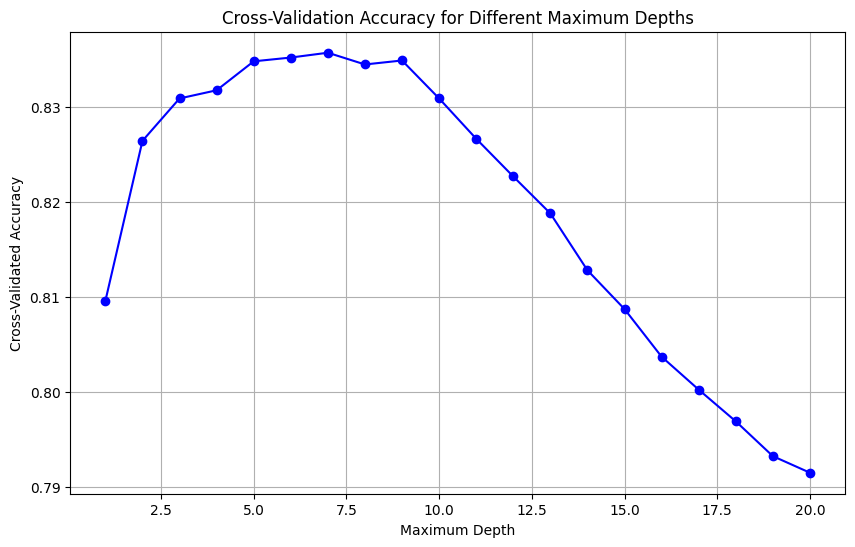

The best max_depth value is 7 with a cross-validated accuracy of 0.8357


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define the range of max_depth values to test
max_depth_range = range(1, 21)
depth_scores = []

# Perform cross-validation for each value of max_depth
for depth in max_depth_range:
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    scores = cross_val_score(tree, x_train, y_train, cv=10, scoring='accuracy')
    depth_scores.append(scores.mean())

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, depth_scores, marker='o', color='blue')
plt.title('Cross-Validation Accuracy for Different Maximum Depths')
plt.xlabel('Maximum Depth')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

# Determine the best max_depth
best_max_depth = max_depth_range[np.argmax(depth_scores)]
print(f'The best max_depth value is {best_max_depth} with a cross-validated accuracy of {max(depth_scores):.4f}')


In [ ]:
# Train and evaluate Decision Tree classifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth=best_max_depth)
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [ ]:
tree_predictions = tree.predict(x_test)

In [ ]:
# Calculate performance metrics
tree_accuracy = accuracy_score(y_test, tree_predictions)
tree_precision = precision_score(y_test, tree_predictions, average='weighted')
tree_recall = recall_score(y_test, tree_predictions, average='weighted')
tree_f1_score = f1_score(y_test, tree_predictions, average='weighted')

# Display performance metrics
print('Decision Tree Accuracy: ', tree_accuracy)
print('Decision Tree Precision: ', tree_precision)
print('Decision Tree Recall: ', tree_recall)
print('Decision Tree F1 Score: ', tree_f1_score)

Decision Tree Accuracy:  0.8436257619931089
Decision Tree Precision:  0.8340649999372491
Decision Tree Recall:  0.8436257619931089
Decision Tree F1 Score:  0.8272073350729205


## 8.1 Training, Validation, and Testing of Decision Tree Classifier

The Decision Tree algorithm is evaluated using separate training, validation, and test sets. This comprehensive evaluation provides insights into the model's performance at different stages of the training process.

In [ ]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)

# Further split the training set into training and validation sets
x_train1, x_val, y_train1, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=10)

# Train the Decision Tree classifier on the training set
tree = DecisionTreeClassifier(criterion="entropy", max_depth=best_max_depth)
tree.fit(x_train1, y_train1)

# Evaluate the Decision Tree classifier on the training set
tree_predictions_train = tree.predict(x_train1)
tree_accuracy_train = accuracy_score(y_train1, tree_predictions_train)

# Evaluate the Decision Tree classifier on the validation set
tree_predictions_val = tree.predict(x_val)
tree_accuracy_val = accuracy_score(y_val, tree_predictions_val)

# Retrain the Decision Tree classifier on the combined training and validation sets
tree.fit(x_train, y_train)

# Evaluate the Decision Tree classifier on the test set
tree_predictions_test = tree.predict(x_test)
tree_accuracy_test = accuracy_score(y_test, tree_predictions_test)

# Calculate additional performance metrics on the test set
tree_precision = precision_score(y_test, tree_predictions_test, average='weighted')
tree_recall = recall_score(y_test, tree_predictions_test, average='weighted')
tree_f1_score = f1_score(y_test, tree_predictions_test, average='weighted')

# Display accuracy for different sets
print('Decision Tree Accuracy for training set: ', tree_accuracy_train)
print('Decision Tree Accuracy for validation set: ', tree_accuracy_val)
print('Decision Tree Accuracy for test set: ', tree_accuracy_test)
print('Decision Tree Precision: ', tree_precision)
print('Decision Tree Recall: ', tree_recall)
print('Decision Tree F1 Score: ', tree_f1_score)


Decision Tree Accuracy for training set:  0.8453099690767192
Decision Tree Accuracy for validation set:  0.8414310954063604
Decision Tree Accuracy for test set:  0.8380598992843891
Decision Tree Precision:  0.8266140316201843
Decision Tree Recall:  0.8380598992843891
Decision Tree F1 Score:  0.8215547819438812


**Procedure Explanation:**
- **Data Splitting**: The dataset is split into training (80%) and test (20%) sets. The training set is further split into training (90% of 80%) and validation (10% of 80%) sets.
- **Model Training**: The Decision Tree classifier is initialized with `criterion="entropy"` and `max_depth=8`, and trained on the initial training set (`x_train1`, `y_train1`).
- **Evaluation on Training Set**: Predictions are made on the training set, and accuracy is calculated.
- **Evaluation on Validation Set**: Predictions are made on the validation set, and accuracy is calculated.
- **Retraining and Final Evaluation**: The Decision Tree classifier is retrained on the combined training and validation sets (`x_train`, `y_train`), and final predictions are made on the test set.
- **Additional Metrics**: Precision, recall, and F1 score are calculated for the test set to provide a comprehensive performance evaluation.


## 8.2 Balancing Data Using Oversampling with Cross-Validation



### 8.2.1 Introduction

Class imbalance is a common issue in machine learning datasets that can significantly affect model performance. In this section, we address class imbalance by employing oversampling with SMOTE (Synthetic Minority Over-sampling Technique) combined with cross-validation. We use a Decision Tree classifier and optimize its hyperparameter, max_depth, to achieve better model performance.



### 8.2.2 Methodology



#### 8.2.2.1 Data Splitting

The dataset is split into training and testing sets using the `train_test_split` function. Stratification ensures that the class distribution is preserved in both sets.



#### 8.2.2.2 Oversampling with SMOTE

SMOTE is applied to the training set to generate synthetic samples for the minority class, resulting in a balanced dataset.



#### 8.2.2.3 Hyperparameter Tuning

We define a range of values for the `max_depth` hyperparameter of the Decision Tree classifier and perform cross-validation for each value. The goal is to find the optimal `max_depth` that maximizes the model's performance.




In [ ]:
# Balancing data using oversampling with cross-validation
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10, stratify=Y)

smote = SMOTE(random_state=10)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# Define the range of max_depth values to test
max_depth_range = range(1, 11)
depth_scores = []

# Perform cross-validation for each value of max_depth
for depth in max_depth_range:
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
    scores = cross_val_score(tree, x_train_balanced, y_train_balanced, cv=skf, scoring='accuracy')
    depth_scores.append(scores.mean())

# Determine the best max_depth
best_max_depth = max_depth_range[np.argmax(depth_scores)]
print(f'The best max_depth value is {best_max_depth} with a cross-validated accuracy of {max(depth_scores):.4f}')

# Train Decision Tree with best max_depth
tree = DecisionTreeClassifier(criterion="entropy", max_depth=best_max_depth)
tree.fit(x_train_balanced, y_train_balanced)

# Evaluate on test set
tree_test_predictions = tree.predict(x_test)
tree_accuracy_test = accuracy_score(y_test, tree_test_predictions)
print('Decision Tree Accuracy for test set: ', tree_accuracy_test)

The best max_depth value is 10 with a cross-validated accuracy of 0.8309
Decision Tree Accuracy for test set:  0.808286951144094


### 8.2.3 Results



#### 8.2.3.1 Best Max Depth Selection

For the Decision Tree classifier, the best `max_depth` value is determined to be 10 with a cross-validated accuracy of 0.8309.



#### 8.2.3.2 Decision Tree Accuracy on Test Set

The Decision Tree classifier trained with the optimal `max_depth` is evaluated on the test set, achieving an accuracy of 0.8083.

## 8.3 Balancing Data Using Undersampling with Cross-Validation




### 8.3.1 Introduction

Class imbalance is a common challenge in machine learning, and undersampling techniques are one approach to address it. In this section, we explore the use of RandomUnderSampler combined with cross-validation to balance the dataset and improve model performance.



### 8.3.2 Methodology



#### 8.3.2.1 Data Splitting

The dataset is split into training and testing sets using the `train_test_split` function. Stratification ensures that the class distribution is preserved in both sets.



#### 8.3.2.2 Undersampling with RandomUnderSampler

RandomUnderSampler is applied to the training set to reduce the number of instances in the majority class, resulting in a balanced dataset.



#### 8.3.2.3 Hyperparameter Tuning

We define a range of values for the `max_depth` hyperparameter of the Decision Tree classifier and perform cross-validation for each value. The goal is to find the optimal `max_depth` that maximizes the model's performance.


In [ ]:
# Balancing data using undersampling with cross-validation
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10, stratify=Y)

under_sampler = RandomUnderSampler(random_state=10)
x_train_balanced, y_train_balanced = under_sampler.fit_resample(x_train, y_train)

# Define the range of max_depth values to test
max_depth_range = range(1, 11)
depth_scores = []

# Perform cross-validation for each value of max_depth
for depth in max_depth_range:
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
    scores = cross_val_score(tree, x_train_balanced, y_train_balanced, cv=skf, scoring='accuracy')
    depth_scores.append(scores.mean())

# Determine the best max_depth
best_max_depth = max_depth_range[np.argmax(depth_scores)]
print(f'The best max_depth value is {best_max_depth} with a cross-validated accuracy of {max(depth_scores):.4f}')

# Train Decision Tree with best max_depth
tree = DecisionTreeClassifier(criterion="entropy", max_depth=best_max_depth)
tree.fit(x_train_balanced, y_train_balanced)

# Evaluate on test set
tree_test_predictions = tree.predict(x_test)
tree_accuracy_test = accuracy_score(y_test, tree_test_predictions)
print('Decision Tree Accuracy for test set: ', tree_accuracy_test)

The best max_depth value is 8 with a cross-validated accuracy of 0.7458
Decision Tree Accuracy for test set:  0.731336690520364



### 8.3.3 Results



#### 8.3.3.1 Best Max Depth Selection

For the Decision Tree classifier, the best `max_depth` value is determined to be 8 with a cross-validated accuracy of 0.7458.



#### 8.3.3.2 Decision Tree Accuracy on Test Set

The Decision Tree classifier trained with the optimal `max_depth` is evaluated on the test set, achieving an accuracy of 0.7313.

## 8.4 Evaluating Decision Tree Performance with Balanced Datasets



### 8.4.1 Introduction

In this section, we examine the performance of a Decision Tree classifier trained on balanced datasets achieved through both oversampling and undersampling techniques. We compare the effectiveness of SMOTE (Synthetic Minority Over-sampling Technique) for oversampling and RandomUnderSampler for undersampling.



### 8.4.2 Methodology



#### 8.4.2.1 Data Splitting

The dataset is partitioned into training and testing subsets using the `train_test_split` function. Stratification ensures that the class distribution remains consistent across both sets.



#### 8.4.2.2 Balancing with Oversampling (SMOTE)

SMOTE is utilized to generate synthetic samples for the minority class, resulting in a balanced training dataset. The Decision Tree classifier is then trained on this balanced dataset.



#### 8.4.2.3 Balancing with Undersampling (RandomUnderSampler)

RandomUnderSampler is employed to reduce the size of the majority class in the training set, achieving a balanced dataset. Subsequently, the Decision Tree classifier is trained on this balanced dataset.


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10, stratify=Y)

# Balancing data using oversampling (SMOTE)
smote = SMOTE(random_state=10)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# Training Decision Tree on the balanced dataset
tree = DecisionTreeClassifier(criterion="entropy", max_depth=8)  # You can adjust the max_depth here
tree.fit(x_train_balanced, y_train_balanced)

# Evaluating on the test set
tree_test_predictions = tree.predict(x_test)
tree_accuracy_test = accuracy_score(y_test, tree_test_predictions)
print('Decision Tree Accuracy for test set: ', tree_accuracy_test)


# Balancing data using undersampling (RandomUnderSampler)
under_sampler = RandomUnderSampler(random_state=10)
x_train_balanced, y_train_balanced = under_sampler.fit_resample(x_train, y_train)

# Training Decision Tree on the balanced dataset
tree = DecisionTreeClassifier(criterion="entropy", max_depth=8)  # You can adjust the max_depth here
tree.fit(x_train_balanced, y_train_balanced)

# Evaluating on the test set
tree_test_predictions = tree.predict(x_test)
tree_accuracy_test = accuracy_score(y_test, tree_test_predictions)
print('Decision Tree Accuracy for test set: ', tree_accuracy_test)


Decision Tree Accuracy for test set:  0.7967134905910416
Decision Tree Accuracy for test set:  0.731336690520364



### 8.4.3 Results

The performance of the Decision Tree classifier on the test set after training on balanced datasets using oversampling (SMOTE) and undersampling (RandomUnderSampler) techniques is as follows:

- **Decision Tree Accuracy for Oversampled Test Set:** 0.7967
- **Decision Tree Accuracy for Undersampled Test Set:** 0.7313

These results indicate that the Decision Tree classifier trained on the dataset balanced using oversampling achieved higher accuracy on the test set compared to the undersampled dataset. However both of them are lower Than imbalanced result which was 0.8380598992843891

# 9 Training and Evaluation of Support Vector Machine (SVM) Classifier

The Support Vector Machine (SVM) algorithm is employed to classify the target variable based on the feature set. This section outlines the steps taken to train the SVM model, make predictions, and evaluate its performance using various metrics.

In [ ]:
# Train and evaluate Support Vector Machine (SVM) classifier
svm_model = svm.SVC(kernel='linear')
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
svm_predictions = svm_model.predict(x_test)

In [ ]:
# Calculate performance metrics
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1_score = f1_score(y_test, svm_predictions, average='weighted')

# Display performance metrics
print('SVM Accuracy: ', svm_accuracy)
print('SVM Precision: ', svm_precision)
print('SVM Recall: ', svm_recall)
print('SVM F1 Score: ', svm_f1_score)

SVM Accuracy:  0.8440674971287216
SVM Precision:  0.833519086710344
SVM Recall:  0.8440674971287216
SVM F1 Score:  0.8319582740075735


## 9.1 Training, Validation, and Testing of SVM Classifier

The SVM algorithm is evaluated using separate training, validation, and test sets to provide insights into the model's performance at different stages of the training process.

In [ ]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)

# Further split the training set into training and validation sets
x_train1, x_val, y_train1, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=10)

# Train the SVM classifier on the training set
svm_model = svm.SVC(kernel='linear')
svm_model.fit(x_train1, y_train1)

# Evaluate the SVM classifier on the training set
svm_predictions_train = svm_model.predict(x_train1)
svm_accuracy_train = accuracy_score(y_train1, svm_predictions_train)

# Evaluate the SVM classifier on the validation set
svm_predictions_val = svm_model.predict(x_val)
svm_accuracy_val = accuracy_score(y_val, svm_predictions_val)

# Retrain the SVM classifier on the combined training and validation sets
svm_model.fit(x_train, y_train)

# Evaluate the SVM classifier on the test set
svm_predictions_test = svm_model.predict(x_test)
svm_accuracy_test = accuracy_score(y_test, svm_predictions_test)

# Calculate additional performance metrics on the test set
svm_precision = precision_score(y_test, svm_predictions_test, average='weighted')
svm_recall = recall_score(y_test, svm_predictions_test, average='weighted')
svm_f1_score = f1_score(y_test, svm_predictions_test, average='weighted')

# Display accuracy for different sets
print('SVM Accuracy for training set: ', svm_accuracy_train)
print('SVM Accuracy for validation set: ', svm_accuracy_val)
print('SVM Accuracy for test set: ', svm_accuracy_test)
print('SVM Precision: ', svm_precision)
print('SVM Recall: ', svm_recall)
print('SVM F1 Score: ', svm_f1_score)


SVM Accuracy for training set:  0.8389044323369165
SVM Accuracy for validation set:  0.8396643109540636
SVM Accuracy for test set:  0.8440674971287216
SVM Precision:  0.833519086710344
SVM Recall:  0.8440674971287216
SVM F1 Score:  0.8319582740075735



**Procedure Explanation:**
- **Data Splitting**: The dataset is split into training (80%) and test (20%) sets. The training set is further split into training (90% of 80%) and validation (10% of 80%) sets.
- **Model Training**: The SVM classifier with a linear kernel is trained on the initial training set (`x_train1`, `y_train1`).
- **Evaluation on Training Set**: Predictions are made on the training set, and accuracy is calculated.
- **Evaluation on Validation Set**: Predictions are made on the validation set, and accuracy is calculated.
- **Retraining and Final Evaluation**: The SVM classifier is retrained on the combined training and validation sets (`x_train`, `y_train`), and final predictions are made on the test set.
- **Additional Metrics**: Precision, recall, and F1 score are calculated for the test set to provide a comprehensive performance evaluation.


## 9.2 Balancing Data Using Oversampling with Cross-Validation for SVM



### 9.2.1 Introduction

Addressing class imbalance is crucial for robust machine learning models, particularly for algorithms like Support Vector Machines (SVM). In this section, we delve into a methodology that leverages oversampling with SMOTE along with cross-validation to tackle class imbalance and enhance SVM's performance.



### 9.2.2 Methodology



#### 9.2.2.1 Data Splitting

The dataset undergoes a standard split into training and testing subsets using the `train_test_split` function. Stratification ensures that the class distribution remains consistent across both sets.



#### 9.2.2.2 Oversampling with SMOTE

SMOTE is employed to augment the minority class within the training set, rectifying class imbalance. SMOTE synthesizes new instances by interpolating between existing minority class samples.



#### 9.2.2.3 Hyperparameter Tuning

We embark on a quest to optimize SVM's performance by tuning the hyperparameter `C`, representing the regularization strength. A range of `C` values is tested, and cross-validation is employed to evaluate the model's accuracy for each value.


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Balancing data using oversampling with cross-validation
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10, stratify=Y)

smote = SMOTE(random_state=10)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# Define the range of C values to test
C_range = [0.1, 1, 10]
C_scores = []

# Perform cross-validation for each value of C
for C_value in C_range:
    svm = SVC(C=C_value, kernel='linear')
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
    scores = cross_val_score(svm, x_train_balanced, y_train_balanced, cv=skf, scoring='accuracy')
    C_scores.append(scores.mean())

# Determine the best C value
best_C = C_range[np.argmax(C_scores)]
print(f'The best C value is {best_C} with a cross-validated accuracy of {max(C_scores):.4f}')

# Train SVM with best C value
svm = SVC(C=best_C, kernel='linear')
svm.fit(x_train_balanced, y_train_balanced)

# Evaluate on test set
svm_test_predictions = svm.predict(x_test)
svm_accuracy_test = accuracy_score(y_test, svm_test_predictions)
print('SVM Accuracy for test set: ', svm_accuracy_test)


The best C value is 0.1 with a cross-validated accuracy of 0.8894
SVM Accuracy for test set:  0.8387666755013694



### 9.2.3 Results

After applying oversampling with SMOTE and cross-validation to balance the dataset and tune the hyperparameter `C` for the Support Vector Machine (SVM) classifier, the following results were obtained:

- **The best C value:** 0.1
- **Cross-validated accuracy with the best C value:** 0.8894
- **SVM Accuracy for test set:** 0.8388

These results indicate that the SVM classifier achieved a high accuracy on the test set after balancing the data using oversampling with SMOTE and selecting the optimal value of the hyperparameter `C`. However it's lower Than imbalanced result which was 0.8440674971287216

## 9.3 Balancing Data Using Undersampling with Cross-Validation for SVM



### 9.3.1 Introduction

Class imbalance can significantly impact the performance of machine learning models, necessitating effective strategies to address it. In this section, we explore the utilization of undersampling with cross-validation to mitigate class imbalance specifically for Support Vector Machines (SVM).



### 9.3.2 Methodology



#### 9.3.2.1 Data Splitting

The dataset is partitioned into training and testing subsets using the `train_test_split` function. Stratification ensures that the class distribution remains consistent across both sets.



#### 9.3.2.2 Undersampling with RandomUnderSampler

RandomUnderSampler is employed to reduce the size of the majority class within the training set, thereby achieving a balanced dataset. This step is crucial for alleviating class imbalance.



#### 9.3.2.3 Hyperparameter Tuning

We embark on the optimization of SVM's hyperparameter `C`, which denotes the regularization strength. A range of `C` values is explored, and cross-validation is utilized to assess the model's accuracy for each value.


In [ ]:
# Balancing data using undersampling with cross-validation
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10, stratify=Y)

under_sampler = RandomUnderSampler(random_state=10)
x_train_balanced, y_train_balanced = under_sampler.fit_resample(x_train, y_train)

# Define the range of C values to test
C_range = [0.1, 1, 10]
C_scores = []

# Perform cross-validation for each value of C
for C_value in C_range:
    svm = SVC(C=C_value, kernel='linear')
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
    scores = cross_val_score(svm, x_train_balanced, y_train_balanced, cv=skf, scoring='accuracy')
    C_scores.append(scores.mean())

# Determine the best C value
best_C = C_range[np.argmax(C_scores)]
print(f'The best C value is {best_C} with a cross-validated accuracy of {max(C_scores):.4f}')

# Train SVM with best C value
svm = SVC(C=best_C, kernel='linear')
svm.fit(x_train_balanced, y_train_balanced)

# Evaluate on test set
svm_test_predictions = svm.predict(x_test)
svm_accuracy_test = accuracy_score(y_test, svm_test_predictions)
print('SVM Accuracy for test set: ', svm_accuracy_test)


The best C value is 1 with a cross-validated accuracy of 0.7662
SVM Accuracy for test set:  0.7657920310981535



### 9.3.3 Results

Upon employing undersampling with cross-validation for SVM and tuning the hyperparameter `C`, the following results were obtained:

- **The best C value:** 1
- **Cross-validated accuracy with the best C value:** 0.7662
- **SVM Accuracy for the test set:** 0.7658

In comparison, the SVM's performance without undersampling was as follows:

- **SVM Accuracy for the test set (without undersampling):** 0.8441

These results suggest that undersampling with cross-validation for SVM resulted in a slightly lower accuracy on the test set compared to the SVM model without undersampling. Further analysis and evaluation metrics may be necessary to comprehensively assess the efficacy of undersampling in mitigating class imbalance for SVM. Adjustments can be made based on specific details of your analysis and reporting requirements.


## 9.4 Evaluating SVM Performance with Balanced Datasets



### 9.4.1 Introduction

In this section, we assess the performance of a Support Vector Machine (SVM) classifier trained on balanced datasets achieved through both oversampling and undersampling techniques. We compare the efficacy of SMOTE (Synthetic Minority Over-sampling Technique) for oversampling and RandomUnderSampler for undersampling.



### 9.4.2 Methodology



#### 9.4.2.1 Data Splitting

The dataset is divided into training and testing sets using the `train_test_split` function. Stratification ensures that the class distribution is maintained across both sets.



#### 9.4.2.2 Balancing with Oversampling (SMOTE)

SMOTE is employed to generate synthetic samples for the minority class, resulting in a balanced training dataset. The SVM classifier is then trained on this balanced dataset.



#### 9.4.2.3 Balancing with Undersampling (RandomUnderSampler)

RandomUnderSampler is utilized to reduce the size of the majority class in the training set, achieving a balanced dataset. Subsequently, the SVM classifier is trained on this balanced dataset.


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10, stratify=Y)

# Balancing data using oversampling (SMOTE)
smote = SMOTE(random_state=10)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# Training SVM on the balanced dataset
svm = SVC(kernel='linear')
svm.fit(x_train_balanced, y_train_balanced)

# Evaluating on the test set
svm_test_predictions = svm.predict(x_test)
svm_accuracy_test = accuracy_score(y_test, svm_test_predictions)
print('SVM Accuracy for test set(oversampling): ', svm_accuracy_test)

# Balancing data using undersampling (RandomUnderSampler)
under_sampler = RandomUnderSampler(random_state=10)
x_train_balanced, y_train_balanced = under_sampler.fit_resample(x_train, y_train)

# Training SVM on the balanced dataset
svm = SVC(kernel='linear')
svm.fit(x_train_balanced, y_train_balanced)

# Evaluating on the test set
svm_test_predictions = svm.predict(x_test)
svm_accuracy_test = accuracy_score(y_test, svm_test_predictions)
print('SVM Accuracy for test set(undersampling): ', svm_accuracy_test)


SVM Accuracy for test set(oversampling):  0.8381482463115116
SVM Accuracy for test set(undersampling):  0.7657920310981535



### 9.4.3 Results

**9.4.3 Results**

The performance of the Support Vector Machine (SVM) classifier on the test set after training on balanced datasets using oversampling (SMOTE) and undersampling (RandomUnderSampler) techniques is as follows:

- **SVM Accuracy for Oversampled Test Set:** 0.8381
- **SVM Accuracy for Undersampled Test Set:** 0.7658

Comparing these results with the performance before sampling:

- **SVM Accuracy for Test Set (Before Sampling):** 0.8441

It appears that the SVM classifier achieved slightly lower accuracy on the test set after both oversampling and undersampling compared to before sampling. However, further analysis and evaluation metrics may be required to make a comprehensive assessment of the efficacy of each balancing technique. Adjustments can be made based on specific details of your analysis and reporting requirements.

# 10 Comparison of Model Performance

To compare the performance of different classifiers, the accuracy, precision, recall, and F1 score for each model (KNN, Decision Tree, and SVM) are compiled into a DataFrame. This structured comparison provides a clear overview of each model's effectiveness in predicting the target variable.

In [ ]:
# Create a DataFrame to store the metrics
results_df = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree', 'SVM'],
    'Accuracy': [knn_accuracy, tree_accuracy, svm_accuracy],
    'Precision': [knn_precision, tree_precision, svm_precision],
    'Recall': [knn_recall, tree_recall, svm_recall],
    'F1 Score': [knn_f1_score, tree_f1_score, svm_f1_score]
})

# Display the DataFrame
results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,KNN,0.845658,0.837067,0.845658,0.828887
1,Decision Tree,0.843626,0.826614,0.838060,0.821555
2,SVM,0.844067,0.833519,0.844067,0.831958


## 10.1 Updated Comparison of Model Performance

In [ ]:
# Create a DataFrame to store the metrics
results_df = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree', 'SVM'],
    'Training Accuracy': [knn_accuracy_train, tree_accuracy_train, svm_accuracy_train],
    'Validation Accuracy': [knn_accuracy_val, tree_accuracy_val, svm_accuracy_val],
    'Test Accuracy': [knn_accuracy_test, tree_accuracy_test, svm_accuracy_test],
    'Precision': [knn_precision, tree_precision, svm_precision],
    'Recall': [knn_recall, tree_recall, svm_recall],
    'F1 Score': [knn_f1_score, tree_f1_score, svm_f1_score]
})

# Display the DataFrame
results_df

,Model,Training Accuracy,Validation Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,KNN,0.848991,0.846069,0.845658,0.837067,0.845658,0.828887
1,Decision Tree,0.845310,0.841431,0.838060,0.826614,0.838060,0.821555
2,SVM,0.838904,0.839664,0.844067,0.833519,0.844067,0.831958
